# Librerias

In [110]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math as math

from glob import glob
from collections import OrderedDict
from scipy.optimize import least_squares
from scipy.optimize import curve_fit

# Funciones

In [197]:
#Lineal
def lineal(x,a,b):
  f= a*x+b
  return f

def gauss(X,X_mean,sigma,C):
    return C*np.exp(-(X-X_mean)**2/(2*sigma**2))

def ploteo_gauss(dt_x, dt_y, mu_ploteo, sigma_ploteo, C_ploteo, color_ploteo, label_ploteo, x_label, y_label, rtrn=False):

  pop_ploteo, cov_ploteo= curve_fit(f=gauss, xdata= dt_x, ydata= dt_y, p0=[mu_ploteo,sigma_ploteo,C_ploteo], maxfev=1000000)

  mu=round(pop_ploteo[0],0)
  sigma=pop_ploteo[1]
  C=pop_ploteo[2]

  fig,ax = plt.subplots()
  plt.errorbar(dt_x,dt_y,fmt=".:" , color=color_ploteo , label=label_ploteo)
  plt.plot(dt_x,gauss(dt_x, mu, sigma, C),color='gold')
  plt.vlines(mu, ymin=0, ymax= max(dt_y), color= "red" )
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.legend()
  plt.show()

  print('El maximo es en el canal: ', round(mu,0), 'y el sigma es: ', sigma, 'La constante C es: ', C)
  print('Las incertezas son: ', np.sqrt(np.diag(cov_ploteo)))


  if rtrn==False:
    return

  elif rtrn==True:
    return mu, sigma, C, np.sqrt(np.diag(cov_ploteo))


def Doble_gauss(X, X_mean1, sigma1, C1, X_mean2, sigma2, C2):
    return C1*np.exp(-(X-X_mean1)**2/(2*sigma1**2)) + C2*np.exp(-(X-X_mean2)**2/(2*sigma2**2))

def ploteo_Doble_gauss(dt_x, dt_y, mu_ploteo1, sigma_ploteo1, C_ploteo1, mu_ploteo2, sigma_ploteo2, C_ploteo2, color_ploteo, label_ploteo, x_label, y_label, rtrn=False):

  pop_ploteo, cov_ploteo= curve_fit(f=Doble_gauss, xdata= dt_x, ydata= dt_y, p0=[mu_ploteo1, sigma_ploteo1, C_ploteo1, mu_ploteo2, sigma_ploteo2, C_ploteo2], maxfev=1000000)

  mu1=round(pop_ploteo[0],0)
  sigma1=pop_ploteo[1]
  C1=pop_ploteo[2]

  mu2=round(pop_ploteo[3],0)
  sigma2=pop_ploteo[4]
  C2=pop_ploteo[5]

  fig,ax = plt.subplots()
  plt.errorbar(dt_x,dt_y,fmt=".:" , color=color_ploteo , label=label_ploteo)
  plt.plot(dt_x,Doble_gauss(dt_x, mu1, sigma1, C1, mu2, sigma2, C2),color='gold')
  plt.vlines(mu1, ymin=0, ymax= max(dt_y), color= "red" )
  plt.vlines(mu2, ymin=0, ymax= max(dt_y), color= "red" )
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.legend()
  plt.show()

  print('El maximo 1 esta en: ', round(mu1,0), 'y el sigma es: ', sigma1, 'La constante C es: ', C1)
  print('El maximo 2 esta en: ', round(mu2,0), 'y el sigma es: ', sigma2, 'La constante C es: ', C2)
  print('Las incertezas son: ', np.sqrt(np.diag(cov_ploteo)))

  return

In [112]:
def Suma_Riemann(dt_x, dt_y, lim_inf, lim_sup):
    
    rango=range(lim_inf,lim_sup)

    suma_inf=0

    for i in rango:

        Delta_x=dt_x[i+1]-dt_x[i]

        suma_inf+= dt_y[i]*Delta_x

    return suma_inf

# Datos

In [113]:
Rutas=glob('D:\Genaro\Experimentos Cuanticos II\TP1- Rayos Gamma\Datos\*.Spe')

In [114]:
Datos={}

Fondo=pd.read_csv('D:\\Genaro\\Experimentos Cuanticos II\\TP1- Rayos Gamma\\Datos\\FONDO-0placas-d-0-mm.Spe', names=['cuentas'], header=11, nrows=1024)

for ruta in Rutas:

  Lista=[]

  #Caracterizacion

  archivo_completo= os.path.basename(ruta)
  nombre_archivo= os.path.splitext(archivo_completo)[0]
  bloques_texto=nombre_archivo.split('-')
  cadena=bloques_texto[3]
  separador=cadena.replace('_','.')

  elemento=bloques_texto[0]
  placas=bloques_texto[1]
  espesor=float(separador)

  array= pd.read_csv(ruta, names=['cuentas'], header=11, nrows=1024)
  Colum_datos=array['cuentas']-Fondo['cuentas']

  #Normalizacion
  
  row_index = 9
  Data= pd.read_csv(ruta, names=['cuentas'], skiprows=lambda x: x != row_index)
  tiempos=Data['cuentas']
  cadena=tiempos[0]
  string_tiempo= cadena.split()[0]
  tiempo_vivo=float(string_tiempo)

  dt_norm=Colum_datos/tiempo_vivo

  Lista+=[elemento, espesor, placas, Colum_datos, dt_norm]
  Datos[ruta]=Lista

In [115]:
canales=np.arange(0,1024,1)
Ba_I0=Datos['D:\Genaro\Experimentos Cuanticos II\TP1- Rayos Gamma\Datos\Ba133-0placas-d-0-mm.Spe'][4]
Am_I0=Datos['D:\Genaro\Experimentos Cuanticos II\TP1- Rayos Gamma\Datos\Am241-0placas-d-0-mm.Spe'][4]
Cs_I0=Datos['D:\Genaro\Experimentos Cuanticos II\TP1- Rayos Gamma\Datos\Cs137-0placas-d-0-mm.Spe'][4]
Na_I0=Datos['D:\\Genaro\\Experimentos Cuanticos II\\TP1- Rayos Gamma\\Datos\\Na22-0placas-d-0-mm.Spe'][4]
Co_I0_p1=Datos['D:\Genaro\Experimentos Cuanticos II\TP1- Rayos Gamma\Datos\Co60-parcial1-d-0-mm.Spe'][4]
Co_I0_p2=Datos['D:\Genaro\Experimentos Cuanticos II\TP1- Rayos Gamma\Datos\Co60-parcial2-d-0-mm.Spe'][4]
Co_I0=Co_I0_p1+Co_I0_p1

Armo una lista con las incertezas asociadas al conteo por canal, dada por una distribucion de poission, su incerteza es raiz(n)

# Calibracion

## Ajustes Gausseanos

### Sodio 22

Espectro Completo
Ajustes


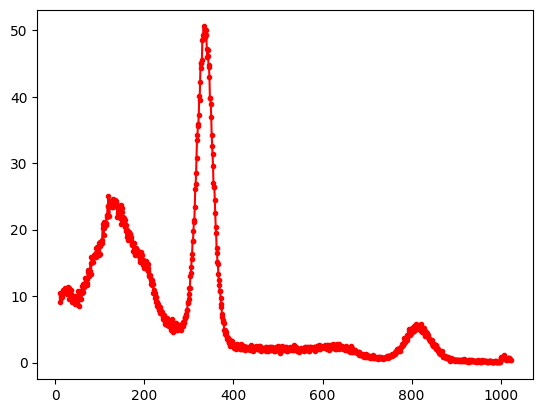

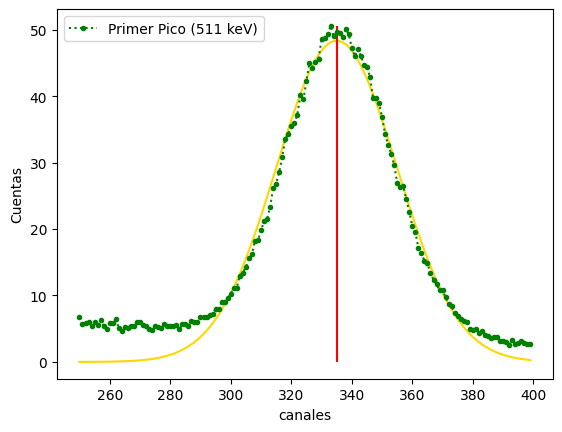

El maximo es en el canal:  335.0 y el sigma es:  19.917841719743812 La constante C es:  48.339391755743776
Las incertezas son:  [0.28642711 0.28650372 0.60203824]


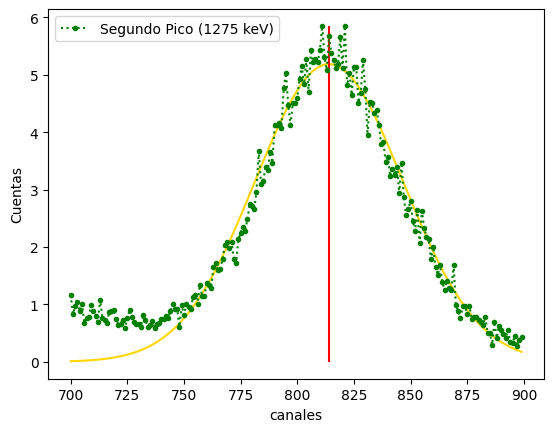

El maximo es en el canal:  814.0 y el sigma es:  32.655551140649244 La constante C es:  5.1848370634169365
Las incertezas son:  [0.45978597 0.46201236 0.06325966]


In [116]:
print('Espectro Completo')
plt.plot(canales[10:], Na_I0[10:], marker='.', color='red')

print('Ajustes')
ploteo_gauss(canales[250:400], Na_I0[250:400], 300,2,1, "green","Primer Pico (511 keV)","canales", "Cuentas")
ploteo_gauss(canales[700:900], Na_I0[700:900], 700,2,1, "green","Segundo Pico (1275 keV)","canales", "Cuentas")

picos_Na=[335,814]
E_Na=[511,1275]

### Cesio 147

Espectro Completo
Ajustes


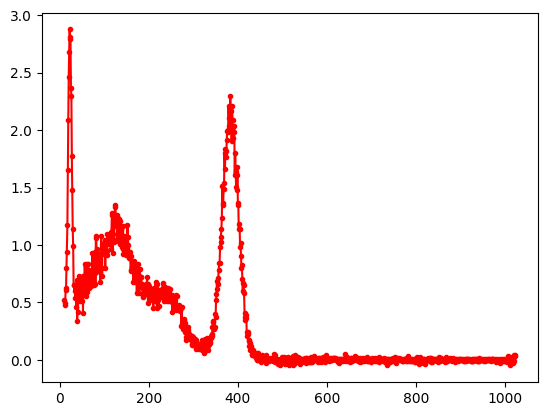

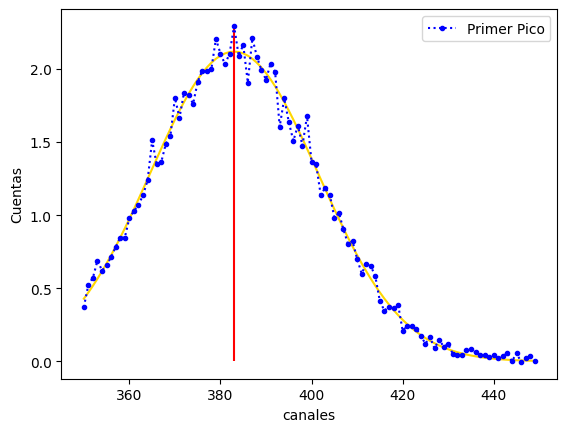

El maximo es en el canal:  383.0 y el sigma es:  18.456535600910442 La constante C es:  2.1187892590309505
Las incertezas son:  [0.15567227 0.16519392 0.01533543]


In [117]:
print('Espectro Completo')
plt.plot(canales[10:1024], Cs_I0[10:1024], marker='.', color='red')

print('Ajustes')
ploteo_gauss(canales[350:450], Cs_I0[350:450], 375,5,1, "blue","Primer Pico","canales", "Cuentas")

picos_Cs=[383]
E_Cs=[662]

### Americio 241

Espectro Completo


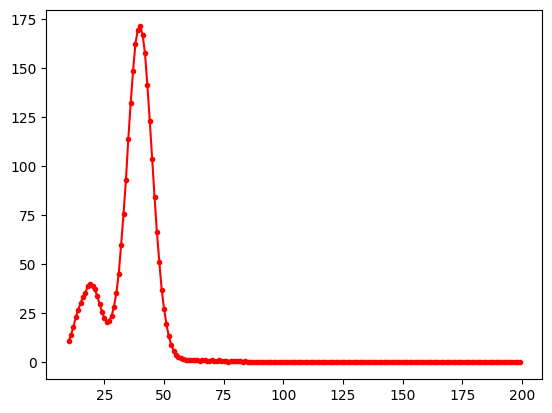

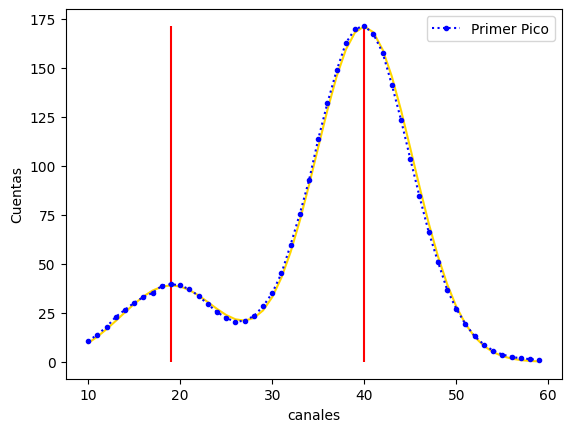

El maximo 1 esta en:  19.0 y el sigma es:  -5.38021558011446 La constante C es:  39.011642093174686
El maximo 2 esta en:  40.0 y el sigma es:  -5.267672735003735 La constante C es:  171.18561014147156
Las incertezas son:  [0.06153979 0.07156767 0.37415089 0.01364711 0.01443187 0.36832344]


In [157]:
print('Espectro Completo')
plt.plot(canales[10:200], Am_I0[10:200], marker='.', color='red')

ploteo_Doble_gauss(canales[10:60], Am_I0[10:60], 22,5,1,40,2,1, "blue","Primer Pico","canales", "Cuentas")

picos_Am=[40]
E_Am=[59]

### Bario 133

Espectro Completo
Ajustes


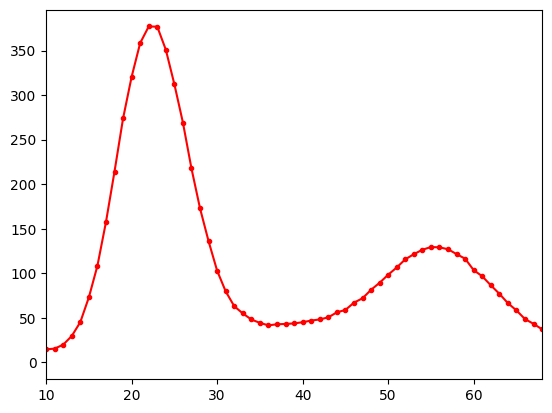

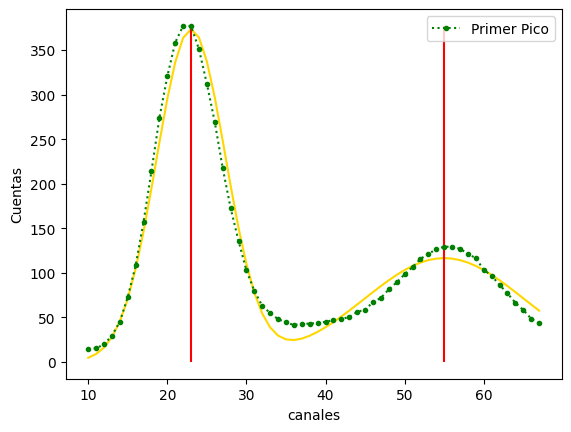

El maximo 1 esta en:  55.0 y el sigma es:  10.105065862267901 La constante C es:  116.50041062690806
El maximo 2 esta en:  23.0 y el sigma es:  -4.389255326941482 La constante C es:  372.62818420478465
Las incertezas son:  [0.37433329 0.43947896 3.36153196 0.067067   0.06775992 4.83745443]


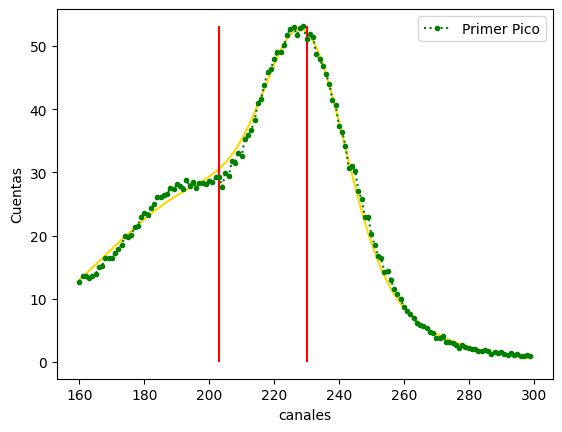

El maximo 1 esta en:  230.0 y el sigma es:  -11.896983689315675 La constante C es:  31.448596975537335
El maximo 2 esta en:  203.0 y el sigma es:  34.63910292312286 La constante C es:  28.14275071736351
Las incertezas son:  [0.14174003 0.1849295  0.44776416 0.53030814 0.34218663 0.33106999]
picos


In [119]:
print('Espectro Completo')
#plt.semilogy(canales[10:243], Ba_I0[10:243], marker='.', color='red')
plt.plot(canales[10:], Ba_I0[10:], marker='.', color='red')
plt.xlim(10,68)


print('Ajustes')
ploteo_Doble_gauss(canales[10:68], Ba_I0[10:68], 22,5,1,40,5,1, "green","Primer Pico","canales", "Cuentas")
ploteo_Doble_gauss(canales[160:300], Ba_I0[160:300], 190,5,1,240,5,1, "green","Primer Pico","canales", "Cuentas")

print('picos')
picos_Ba=[23,55,230]
E_Ba=[31,81,356]

### Cobalto 60

Espectro Completo
Ajustes


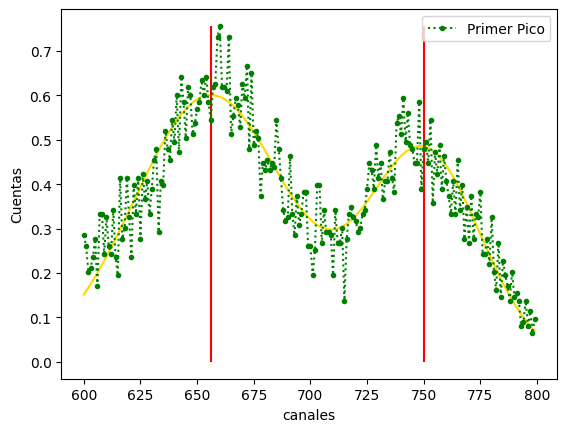

El maximo 1 esta en:  656.0 y el sigma es:  33.76164249494455 La constante C es:  0.600022249483113
El maximo 2 esta en:  750.0 y el sigma es:  24.97419116951847 La constante C es:  0.4725429875331518
Las incertezas son:  [0.8610917  1.094572   0.01058417 0.97223339 1.01173041 0.01174508]
picos


In [120]:
print('Espectro Completo')
#plt.semilogy(canales[:], Co_I0[:], marker='.', color='red')
#plt.plot(canales[:], Co_I0[:], marker='.', color='red')
#plt.xlim(600,800)


print('Ajustes')
ploteo_Doble_gauss(canales[600:800], Co_I0[600:800], 650,5,1,750,5,1, "green","Primer Pico","canales", "Cuentas")

print('picos')
picos_Co=[656,750]
E_Co=[1173.2,1332.5]

## Energia vs Canales

In [121]:
Picos=[]
Energias=[]

Picos+=picos_Ba
Picos+=picos_Am
Picos+=picos_Cs
Picos+=picos_Na
Picos+=picos_Co

Energias+=E_Ba
Energias+=E_Am
Energias+=E_Cs
Energias+=E_Na
Energias+=E_Co

Picos=np.array(Picos)
Energias=np.array(Energias)

C:\Users\vanin\AppData\Local\Temp\ipykernel_9340\2103288597.py:3: RuntimeWarning: invalid value encountered in sqrt
  err=np.diag(np.sqrt(cov))


1.7083122561422126 -14.757119297615953
0.06419217769028186 30.050966612200895


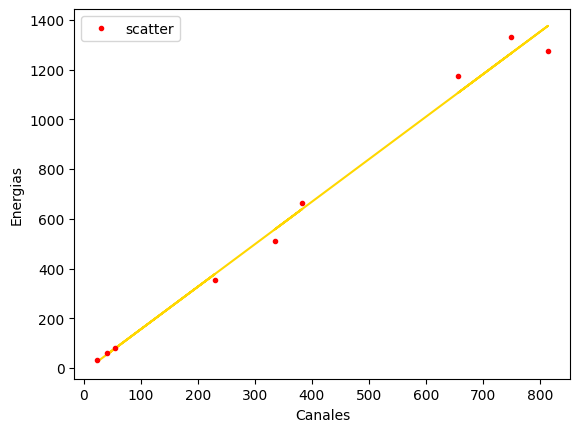

In [122]:
pop, cov= curve_fit(f=lineal, xdata= Picos, ydata= Energias, maxfev=1000000)

err=np.diag(np.sqrt(cov))

print(pop[0], pop[1])
print(err[0], err[1])

p= pop[0]
b= pop[1]

Eje_Energia= p*canales+b

fig,ax = plt.subplots()
plt.errorbar(Picos,Energias, fmt="." , color='red' , label='scatter')
plt.plot(Picos, lineal(Picos, pop[0], pop[1]), color='gold')
plt.xlabel('Canales')
plt.ylabel('Energias')
plt.legend()
plt.show()

# Corroboracion

## Cobalto 60

Espectro Completo
Ajustes


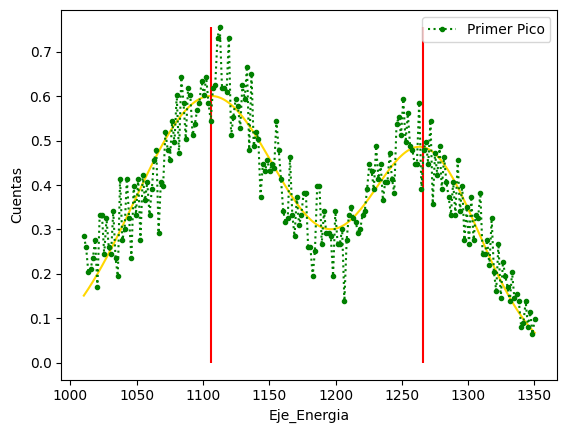

El maximo 1 esta en:  1106.0 y el sigma es:  57.675852974654454 La constante C es:  0.6000214641514352
El maximo 2 esta en:  1266.0 y el sigma es:  42.663212056298114 La constante C es:  0.47254366326871516
Las incertezas son:  [1.47102643 1.86985149 0.01058425 1.660966   1.72846358 0.01174481]
picos


In [123]:
print('Espectro Completo')
#plt.semilogy(Eje_Energia[:], Co_I0[:], marker='.', color='red')
#plt.plot(Eje_Energia[:], Co_I0[:], marker='.', color='red')
#plt.xlim(600,800)


print('Ajustes')
ploteo_Doble_gauss(Eje_Energia[600:800], Co_I0[600:800], 1100,5,1,1300,5,1, "green","Primer Pico","Eje_Energia", "Cuentas")

print('picos')
picos_Co=[656,750]
E_Co=[1173.2,1332.5]

## Bario 133

Espectro Completo
Ajustes


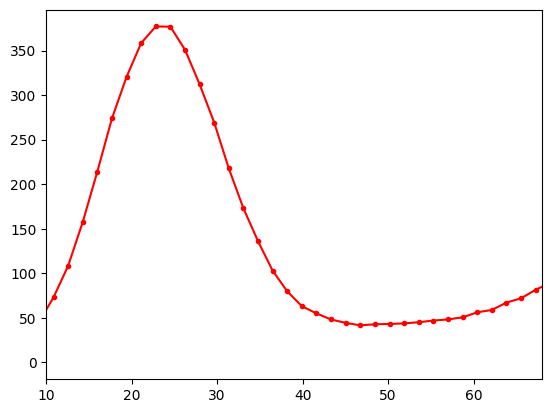

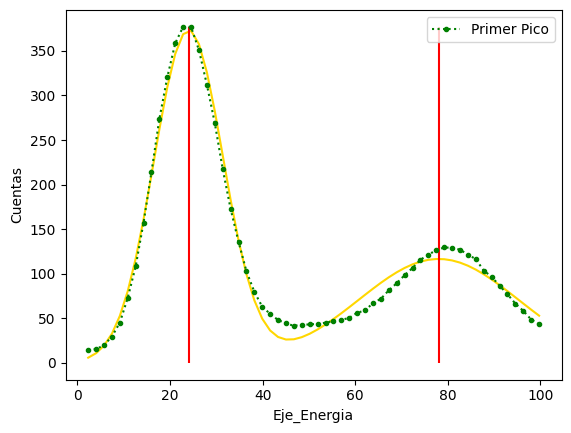

El maximo 1 esta en:  78.0 y el sigma es:  17.262482165916506 La constante C es:  116.5007726740623
El maximo 2 esta en:  24.0 y el sigma es:  -7.498226967038769 La constante C es:  372.62809809150576
Las incertezas son:  [0.63945887 0.75073918 3.36155733 0.11457129 0.11575495 4.83744729]


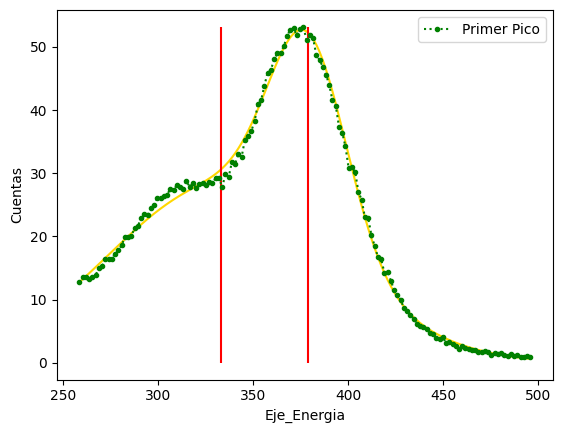

El maximo 1 esta en:  333.0 y el sigma es:  -59.17440174293294 La constante C es:  28.142752689094756
El maximo 2 esta en:  379.0 y el sigma es:  -20.323761274444944 La constante C es:  31.448595657674716
Las incertezas son:  [0.90593296 0.58456209 0.33107011 0.2421363  0.31591745 0.44776437]
picos


In [124]:
print('Espectro Completo')
#plt.semilogy(Eje_Energia[10:243], Ba_I0[10:243], marker='.', color='red')
plt.plot(Eje_Energia[10:], Ba_I0[10:], marker='.', color='red')
plt.xlim(10,68)


print('Ajustes')
ploteo_Doble_gauss(Eje_Energia[10:68], Ba_I0[10:68], 22,5,1,40,5,1, "green","Primer Pico","Eje_Energia", "Cuentas")
ploteo_Doble_gauss(Eje_Energia[160:300], Ba_I0[160:300], 300,5,1,400,5,1, "green","Primer Pico","Eje_Energia", "Cuentas")

print('picos')
picos_Ba=[23,55,230]
E_Ba=[31,81,356]

## Sodio 22

Espectro Completo
Ajustes


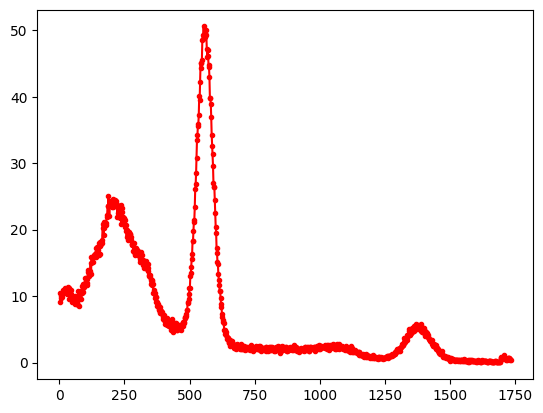

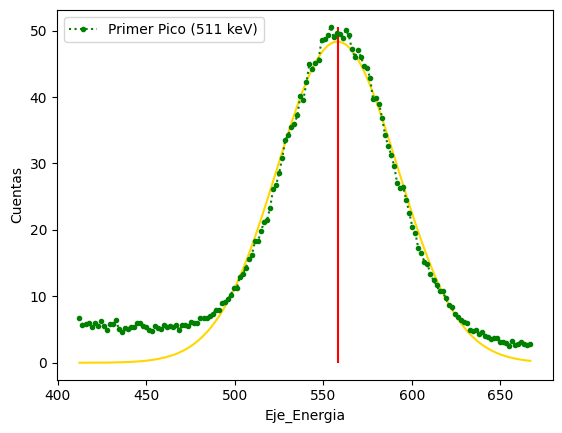

El maximo es en el canal:  558.0 y el sigma es:  -34.02599188795053 La constante C es:  48.33932159790704
Las incertezas son:  [0.48931419 0.48944511 0.6020338 ]


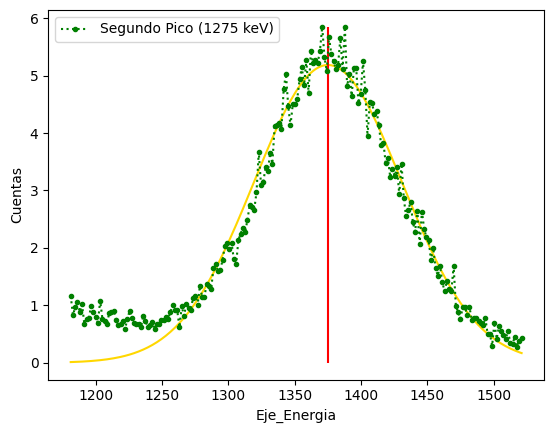

El maximo es en el canal:  1375.0 y el sigma es:  55.78600067420911 La constante C es:  5.184831381269615
Las incertezas son:  [0.78546613 0.78926992 0.06325935]


In [125]:
print('Espectro Completo')
plt.plot(Eje_Energia[10:], Na_I0[10:], marker='.', color='red')

print('Ajustes')
ploteo_gauss(Eje_Energia[250:400], Na_I0[250:400], 550,2,1, "green","Primer Pico (511 keV)","Eje_Energia", "Cuentas")
ploteo_gauss(Eje_Energia[700:900], Na_I0[700:900], 1400,2,1, "green","Segundo Pico (1275 keV)","Eje_Energia", "Cuentas")

picos_Na=[335, 814]
E_Na=[511,1275]

## Americio 241

El pico esta en:  59


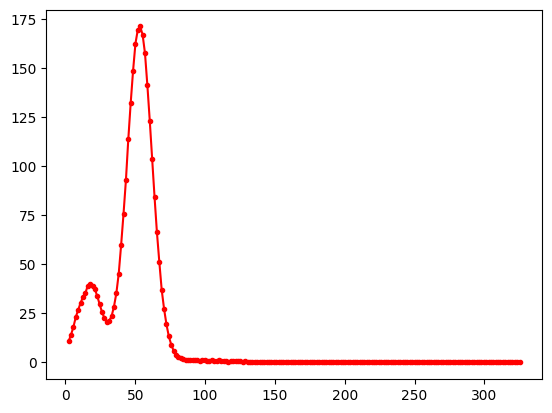

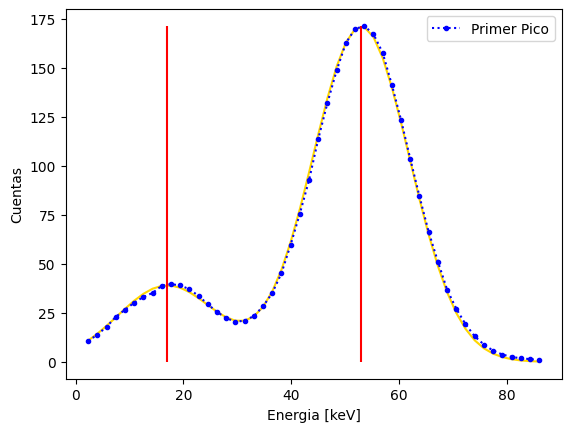

El maximo 1 esta en:  53.0 y el sigma es:  -8.998829954968912 La constante C es:  171.18560952563317
El maximo 2 esta en:  17.0 y el sigma es:  9.19108851402941 La constante C es:  39.01164143076097
Las incertezas son:  [0.02331356 0.02465418 0.36832338 0.10512958 0.12226065 0.37415054]


In [126]:
print('El pico esta en: ', E_Am[0])
plt.plot(Eje_Energia[10:200], Am_I0[10:200], marker='.', color='red')

ploteo_Doble_gauss(Eje_Energia[10:60], Am_I0[10:60], 22,5,1,E_Am[0],2,1, "blue","Primer Pico","Energia [keV]", "Cuentas")

picos_Am=[40]
E_Am=[59]

## Cesio 147

El pico esta en:  662


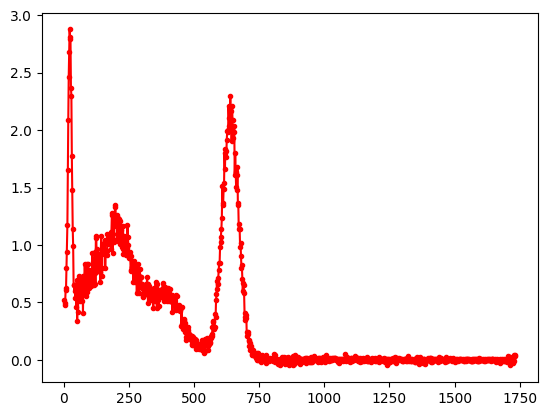

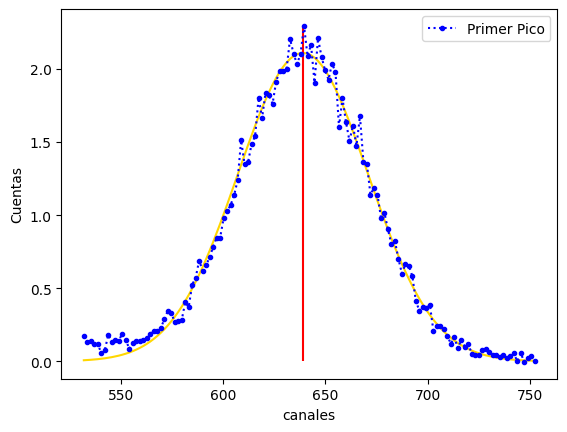

El maximo es en el canal:  639.0 y el sigma es:  31.848896563921073 La constante C es:  2.109848846649607
Las incertezas son:  [0.27907958 0.27911756 0.01601115]


In [127]:
print('El pico esta en: ', E_Cs[0])

plt.plot(Eje_Energia[10:1024], Cs_I0[10:1024], marker='.', color='red')
ploteo_gauss(Eje_Energia[320:450], Cs_I0[320:450], E_Cs[0],5,1, "blue","Primer Pico","canales", "Cuentas")

picos_Cs=[383]
E_Cs=[662]

# Graficos atenuaciones completos

In [128]:
Am_u={}
Ba_u={}
Cs_u={}
Co_u={}
Na_u={}

for i in Datos.values():

    espesor=i[1]
    data_norm=i[4]

    if i[0]=='Am241':
        Am_u[espesor]=np.array(data_norm)
    if i[0]=='Ba133':
        Ba_u[espesor]=np.array(data_norm)
    if i[0]=='Cs137':
        Cs_u[espesor]=np.array(data_norm)
    if i[0]=='Co60':
        Co_u[espesor]=np.array(data_norm)
    if i[0]=='Na22':
        Na_u[espesor]=np.array(data_norm)

Am = dict(sorted(Am_u.items()))
Ba = dict(sorted(Ba_u.items()))
Cs = dict(sorted(Cs_u.items()))
Co = dict(sorted(Co_u.items()))
Na = dict(sorted(Na_u.items()))

list_dicc=[Am, Ba, Cs, Co, Na]

In [129]:
Colores=['midnightblue','blue','blueviolet','darkviolet','purple','magenta','crimson','red']
titulos=['Atenuacion Americio', 'Atenuacion Bario', 'Atenuacion Cesio', 'Atenuacion Cobalto', 'Atenuacion Sodio']

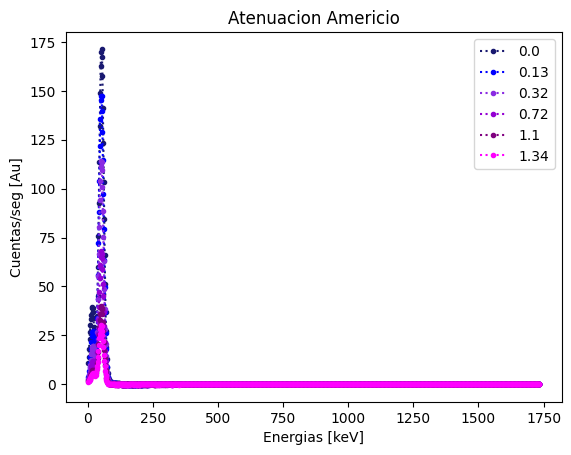

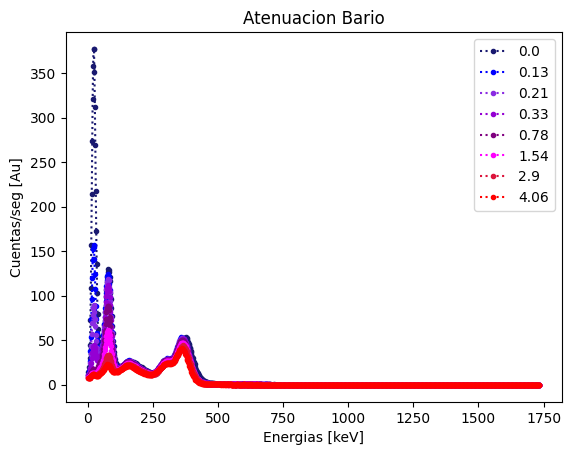

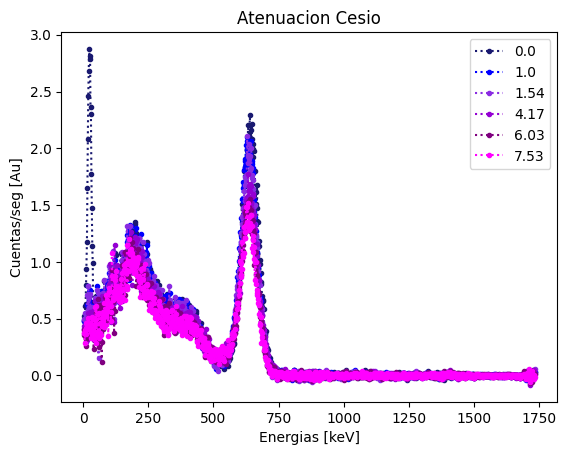

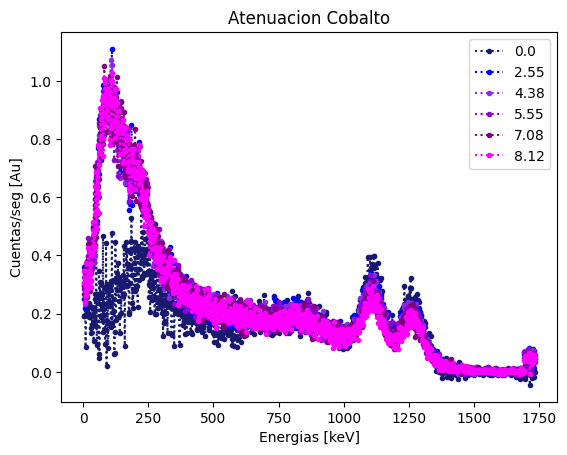

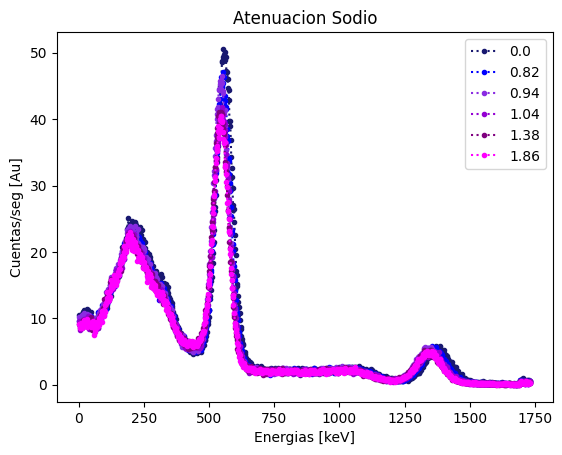

In [130]:
t=0

for dicc in list_dicc:

    c=0
    
    for esp in dicc.keys():

        plt.errorbar(Eje_Energia[10:], dicc[esp][10:], fmt='.:', color=Colores[c], label=str(esp))
        c=c+1
    
    plt.xlabel('Energias [keV]')
    plt.ylabel('Cuentas/seg [Au]')
    plt.title(titulos[t])
    plt.legend()
    plt.show()

    t=t+1


# Intensidades

## Integral Gausseana

In [238]:
def Gauss_int(sigma, Constante):
    return Constante*sigma*np.sqrt(2*np.pi)

def gauss(X,X_mean,sigma,C):
    return C*np.exp(-(X-X_mean)**2/(2*sigma**2))

def Doble_gauss(X, X_mean1, sigma1, C1, X_mean2, sigma2, C2):
    return C1*np.exp(-(X-X_mean1)**2/(2*sigma1**2)) + C2*np.exp(-(X-X_mean2)**2/(2*sigma2**2))

### Sodio

Primer Pico

Espesor:  0.0 sigma=  34.02597562824689 +- 0.489436970134014 Constante= 48.33933314841076
Espesor:  0.82 sigma=  33.90163006126121 +- 0.5209524609243497 Constante= 43.91349790086519
Espesor:  0.94 sigma=  33.82406580245809 +- 0.49483584875137143 Constante= 43.844655686824716
Espesor:  1.04 sigma=  35.08791247553921 +- 0.6045866230222319 Constante= 39.38084196259836
Espesor:  1.38 sigma=  34.854865426991324 +- 0.6016397920132057 Constante= 39.169315654993646
Espesor:  1.86 sigma=  35.20928035820275 +- 0.6361173445699976 Constante= 37.880186363199606


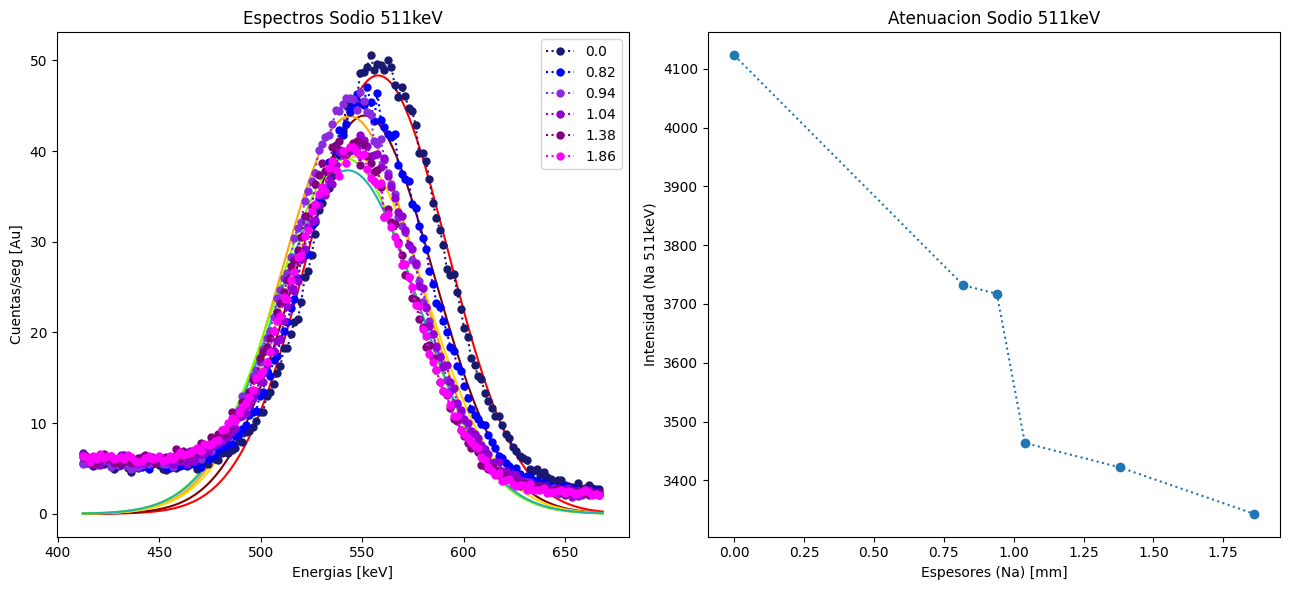

In [286]:
Colores_plot=['red', 'maroon','orange', 'gold', 'lawngreen', 'lightseagreen', 'mediumblue']
Dom=np.linspace(Eje_Energia[250], Eje_Energia[400], 1000)

Int_Sodio_511_g=[]
List_Esp_Na=[]

c=0

for esp in Na.keys():
    List_Esp_Na+=[esp]

Esp_Na=np.array(List_Esp_Na)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))

for esp in Na.keys():

    pop, cov= curve_fit(gauss, Eje_Energia[250:400], Na[esp][250:400], p0=[E_Na[0],2,1], bounds=([0, 0, 0], [np.inf, np.inf, np.inf]))

    err=np.sqrt(np.diag(cov))

    mu_2=pop[0]
    sigma=pop[1]
    Const=pop[2]

    print('Espesor: ', esp, 'sigma= ', sigma, '+-', err[1], 'Constante=', Const)

    Int_g=Gauss_int(sigma, Const)

    Int_Sodio_511_g.append(Int_g)
    
    ax1.errorbar(Eje_Energia[250:400], Na[esp][250:400], fmt='o:', markersize= 5, color=Colores[c], label=str(esp)) 
    ax1.plot(Dom, gauss(Dom, mu_2, sigma, Const), color=Colores_plot[c])
    c=c+1

ax1.set_xlabel('Energias [keV]')
ax1.set_ylabel('Cuentas/seg [Au]')
ax1.set_title('Espectros Sodio 511keV')
ax1.legend()

ax2.errorbar(Esp_Na, np.array(Int_Sodio_511_g), fmt='o:', label='Puntos por Integral Normal')
ax2.set_title('Atenuacion Sodio 511keV')
ax2.set_xlabel('Espesores (Na) [mm]')
ax2.set_ylabel('Intensidad (Na 511keV)')
ax1.legend()

plt.tight_layout()
plt.show()

Segundo Pico

Espesor:  0.0 sigma=  55.78588699227596 +- 0.7892562132302172 Constante= 5.184836657354356
Espesor:  0.82 sigma=  54.11184081480795 +- 0.670283200638883 Constante= 5.184421554593684
Espesor:  0.94 sigma=  54.088378500033336 +- 0.586827568954307 Constante= 5.168068841159339
Espesor:  1.04 sigma=  55.05057814292548 +- 0.625769006441559 Constante= 4.749755430209797
Espesor:  1.38 sigma=  54.253110189160175 +- 0.6181976245858741 Constante= 4.7322025637191185
Espesor:  1.86 sigma=  53.95021869414205 +- 0.6081897491189303 Constante= 4.695528962395433


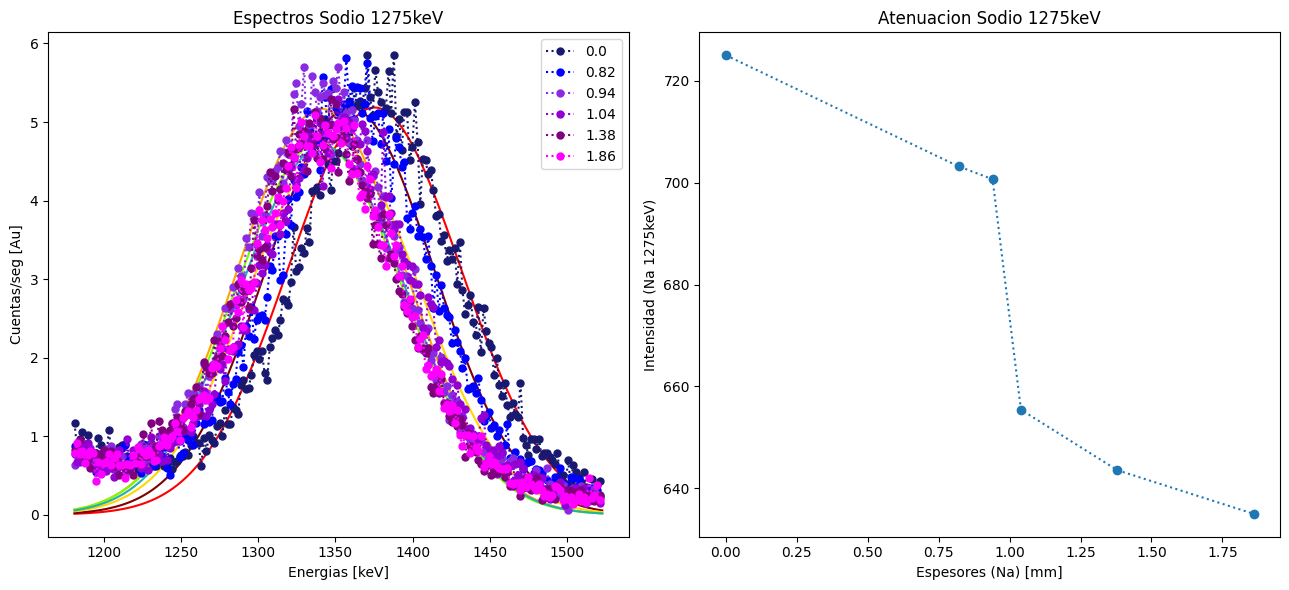

In [287]:
Colores_plot=['red', 'maroon','orange', 'gold', 'lawngreen', 'lightseagreen', 'mediumblue']
Dom=np.linspace(Eje_Energia[700], Eje_Energia[900], 1000)

Int_Sodio_1275_g=[]
List_Esp_Na=[]

c=0

for esp in Na.keys():
    List_Esp_Na+=[esp]

Esp_Na=np.array(List_Esp_Na)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))

for esp in Na.keys():

    pop, cov= curve_fit(gauss, Eje_Energia[700:900], Na[esp][700:900], p0=[1400,2,1], bounds=([0, 0, 0], [np.inf, np.inf, np.inf]))

    err=np.sqrt(np.diag(cov))

    mu_2=pop[0]
    sigma=pop[1]
    Const=pop[2]

    print('Espesor: ', esp, 'sigma= ', sigma, '+-', err[1], 'Constante=', Const)

    Int_g=Gauss_int(sigma, Const)

    Int_Sodio_1275_g.append(Int_g)
    
    ax1.errorbar(Eje_Energia[700:900], Na[esp][700:900], fmt='o:', markersize= 5, color=Colores[c], label=str(esp)) 
    ax1.plot(Dom, gauss(Dom, mu_2, sigma, Const), color=Colores_plot[c])
    c=c+1

ax1.set_xlabel('Energias [keV]')
ax1.set_ylabel('Cuentas/seg [Au]')
ax1.set_title('Espectros Sodio 1275keV')
ax1.legend()

ax2.errorbar(Esp_Na, np.array(Int_Sodio_1275_g), fmt='o:', label='Puntos por Integral Normal')
ax2.set_title('Atenuacion Sodio 1275keV')
ax2.set_xlabel('Espesores (Na) [mm]')
ax2.set_ylabel('Intensidad (Na 1275keV)')
ax1.legend()

plt.tight_layout()
plt.show()

### Cesio

Espesor:  0.0 sigma=  31.84887987738315 +- 0.2791148827916194 Constante= 2.109849399454969
Espesor:  1.0 sigma=  31.530747552016468 +- 0.2779694291612004 Constante= 1.9941595777793293
Espesor:  1.54 sigma=  31.92149399582102 +- 0.31497464550517157 Constante= 1.8782241736094367
Espesor:  4.17 sigma=  33.50643670340649 +- 0.3815445007105569 Constante= 1.607293996995119
Espesor:  6.03 sigma=  33.52785198175408 +- 0.416584751824776 Constante= 1.4295597859563636
Espesor:  7.53 sigma=  33.71927284951514 +- 0.5173274631643455 Constante= 1.3442742557097245


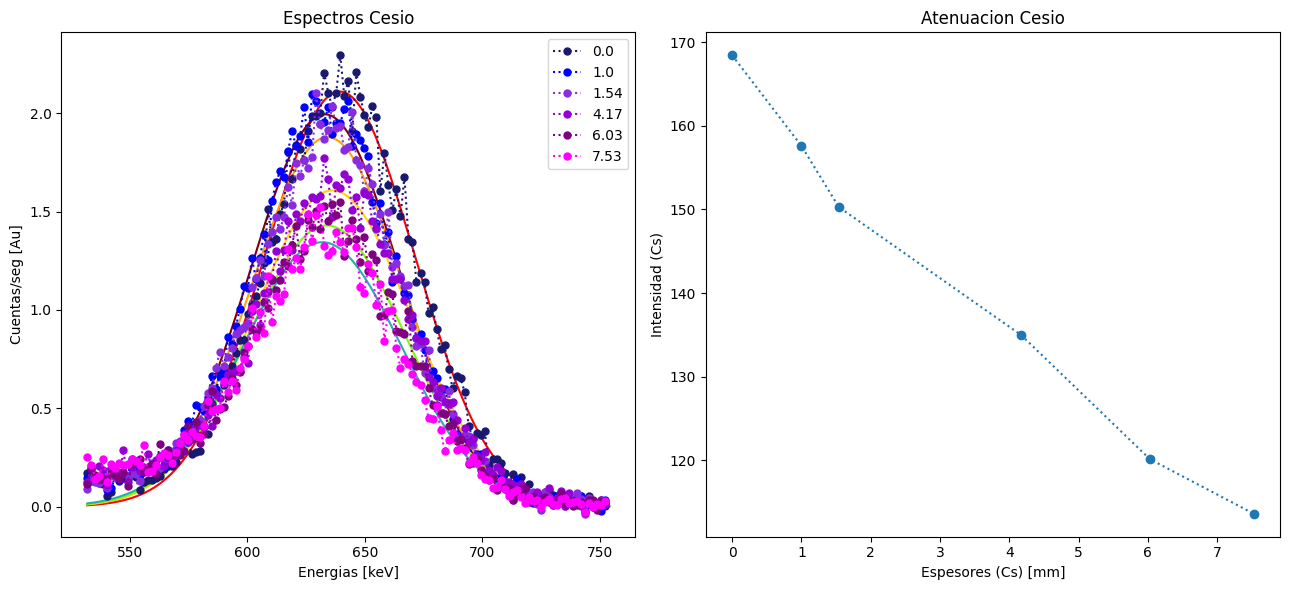

In [284]:
Colores_plot=['red', 'maroon','orange', 'gold', 'lawngreen', 'lightseagreen', 'mediumblue']
Dom=np.linspace(Eje_Energia[320], Eje_Energia[450], 1000)

Int_Cesio_g=[]
List_Esp_Cs=[]

c=0

for esp in Cs.keys():
    List_Esp_Cs+=[esp]

Esp_Cs=np.array(List_Esp_Cs)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))

for esp in Cs.keys():

    pop, cov= curve_fit(gauss, Eje_Energia[320:450], Cs[esp][320:450], p0=[E_Cs[0],2,1], bounds=([0, 0, 0], [np.inf, np.inf, np.inf]))

    err=np.sqrt(np.diag(cov))

    mu_2=pop[0]
    sigma=pop[1]
    Const=pop[2]

    print('Espesor: ', esp, 'sigma= ', sigma, '+-', err[1], 'Constante=', Const)

    Int_g=Gauss_int(sigma, Const)

    Int_Cesio_g.append(Int_g)
    
    ax1.errorbar(Eje_Energia[320:450], Cs[esp][320:450], fmt='o:', markersize= 5, color=Colores[c], label=str(esp)) 
    ax1.plot(Dom, gauss(Dom, mu_2, sigma, Const), color=Colores_plot[c])
    c=c+1

ax1.set_xlabel('Energias [keV]')
ax1.set_ylabel('Cuentas/seg [Au]')
ax1.set_title('Espectros Cesio')
ax1.legend()

ax2.errorbar(Esp_Cs, np.array(Int_Cesio_g), fmt='o:', label='Puntos por Integral Normal')
ax2.set_title('Atenuacion Cesio')
ax2.set_xlabel('Espesores (Cs) [mm]')
ax2.set_ylabel('Intensidad (Cs)')
ax1.legend()

plt.tight_layout()
plt.show()

### Cobalto

Primer Pico

Espesor:  0.0 sigma=  50.98448032619633 +- 1.7152481925195344 Constante= 0.3228523546193003
Espesor:  2.55 sigma=  57.71783408777044 +- 1.4930915456551552 Constante= 0.2888037064110264
Espesor:  4.38 sigma=  56.38600988671555 +- 1.5198794005832188 Constante= 0.2789900180883625
Espesor:  5.55 sigma=  58.469842870568876 +- 1.5160772808104206 Constante= 0.2605139317460468
Espesor:  7.08 sigma=  61.19734724528302 +- 1.7732370269874997 Constante= 0.23902948600882803
Espesor:  8.12 sigma=  62.97272182932866 +- 1.6140135543759904 Constante= 0.22885336358004696


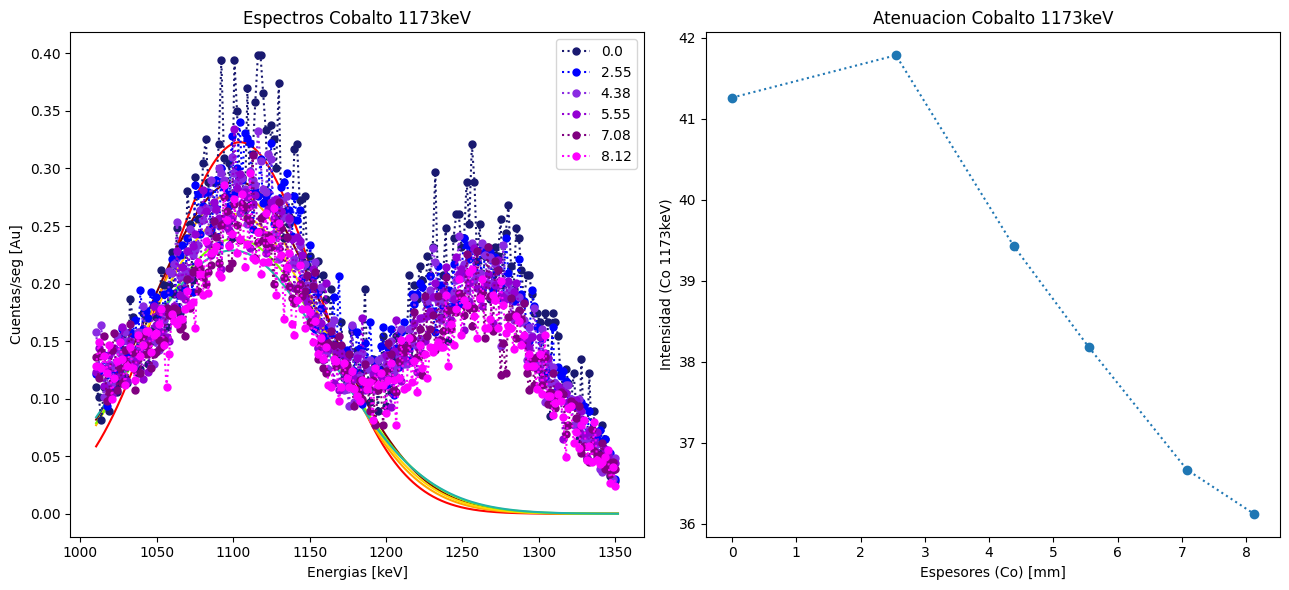

In [280]:
Colores_plot=['red', 'maroon','orange', 'gold', 'lawngreen', 'lightseagreen', 'mediumblue']
Dom=np.linspace(Eje_Energia[600], Eje_Energia[800], 1000)

Int_Cobalto_1173_g=[]
List_Esp_Co=[]

c=0

for esp in Co.keys():
    #if esp!=2.55:

    List_Esp_Co+=[esp]

Esp_Co=np.array(List_Esp_Co)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))

for esp in Co.keys():

    #if esp!=2.55:

    pop, cov= curve_fit(Doble_gauss, Eje_Energia[600:800], Co[esp][600:800], p0=[1100,5,1,1300,2,1], bounds=([0, 0, 0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf]))

    err=np.sqrt(np.diag(cov))

    mu=pop[0]
    sigma=pop[1]
    Const=pop[2]

    print('Espesor: ', esp, 'sigma= ', sigma, '+-', err[4], 'Constante=', Const)

    Int_g=Gauss_int(sigma, Const)

    Int_Cobalto_1173_g.append(Int_g)
    
    ax1.errorbar(Eje_Energia[600:800], Co[esp][600:800], fmt='o:', markersize= 5, color=Colores[c], label=str(esp)) 
    ax1.plot(Dom, gauss(Dom, mu, sigma, Const), color=Colores_plot[c])
    c=c+1

ax1.set_xlabel('Energias [keV]')
ax1.set_ylabel('Cuentas/seg [Au]')
ax1.set_title('Espectros Cobalto 1173keV')
ax1.legend()

ax2.errorbar(Esp_Co, np.array(Int_Cobalto_1173_g), fmt='o:', label='Puntos por Integral Normal')
ax2.set_title('Atenuacion Cobalto 1173keV')
ax2.set_xlabel('Espesores (Co) [mm]')
ax2.set_ylabel('Intensidad (Co 1173keV)')
ax1.legend()

plt.tight_layout()
plt.show()

Segundo Pico

Espesor:  0.0 sigma=  43.06758324644396 +- 1.7152481925195344 Constante= 0.24744316436682315
Espesor:  2.55 sigma=  44.86328253716833 +- 1.4930915456551552 Constante= 0.21384945356282994
Espesor:  4.38 sigma=  43.582239347032555 +- 1.5198794005832188 Constante= 0.20798193475929333
Espesor:  5.55 sigma=  43.59003777466419 +- 1.5160772808104206 Constante= 0.19548275065631898
Espesor:  7.08 sigma=  42.970597792609745 +- 1.7732370269874997 Constante= 0.1816281876415688
Espesor:  8.12 sigma=  41.46025021488094 +- 1.6140135543759904 Constante= 0.17356942327884645


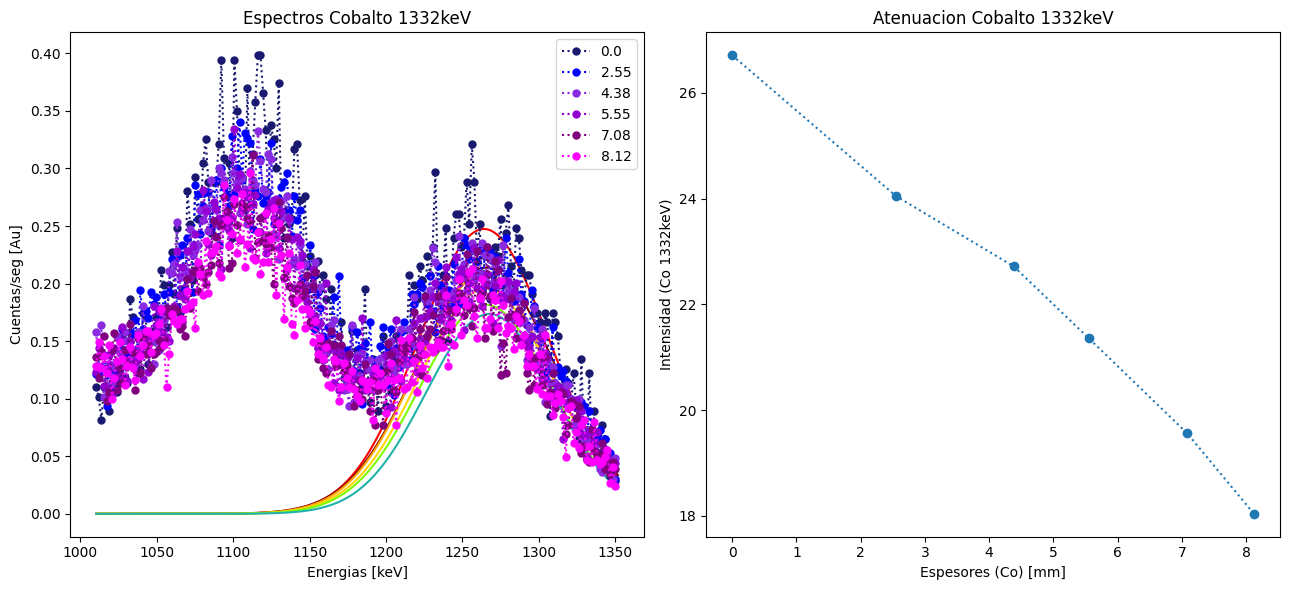

In [275]:
Colores_plot=['red', 'maroon','orange', 'gold', 'lawngreen', 'lightseagreen', 'mediumblue']
Dom=np.linspace(Eje_Energia[600], Eje_Energia[800], 1000)

Int_Cobalto_1332_g=[]
List_Esp_Co=[]

c=0

for esp in Co.keys():
    List_Esp_Co+=[esp]

Esp_Co=np.array(List_Esp_Co)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))

for esp in Co.keys():

    pop, cov= curve_fit(Doble_gauss, Eje_Energia[600:800], Co[esp][600:800], p0=[1100,5,1,1300,2,1], bounds=([0, 0, 0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf]))

    err=np.sqrt(np.diag(cov))

    mu=pop[3]
    sigma=pop[4]
    Const=pop[5]

    print('Espesor: ', esp, 'sigma= ', sigma, '+-', err[4], 'Constante=', Const)

    Int_g=Gauss_int(sigma, Const)

    Int_Cobalto_1332_g.append(Int_g)
    
    ax1.errorbar(Eje_Energia[600:800], Co[esp][600:800], fmt='o:', markersize= 5, color=Colores[c], label=str(esp)) 
    ax1.plot(Dom, gauss(Dom, mu, sigma, Const), color=Colores_plot[c])
    c=c+1

ax1.set_xlabel('Energias [keV]')
ax1.set_ylabel('Cuentas/seg [Au]')
ax1.set_title('Espectros Cobalto 1332keV')
ax1.legend()

ax2.errorbar(Esp_Co, np.array(Int_Cobalto_1332_g), fmt='o:', label='Puntos por Integral Normal')
ax2.set_title('Atenuacion Cobalto 1332keV')
ax2.set_xlabel('Espesores (Co) [mm]')
ax2.set_ylabel('Intensidad (Co 1332keV)')
ax1.legend()

plt.tight_layout()
plt.show()

### Bario

Tercer Pico

Espesor:  0.0 sigma=  20.71524624348884 +- 0.3527333765940263 Constante= 32.228540764982576
Espesor:  0.13 sigma=  19.948365383751383 +- 0.2922077779669048 Constante= 31.955923573028418
Espesor:  0.21 sigma=  19.893203138562463 +- 0.30235054665643535 Constante= 32.210332772072896
Espesor:  0.33 sigma=  20.028656614805353 +- 0.30195673904465803 Constante= 31.631304084905363
Espesor:  0.78 sigma=  19.893381971137103 +- 0.30439164249754486 Constante= 30.754269070519637
Espesor:  1.54 sigma=  20.199546219552328 +- 0.2761536860275431 Constante= 29.407394473519464
Espesor:  2.9 sigma=  20.00772719582743 +- 0.3114984831819346 Constante= 27.054702741173188
Espesor:  4.06 sigma=  20.21360055579027 +- 0.26358133793398864 Constante= 25.12635059562875


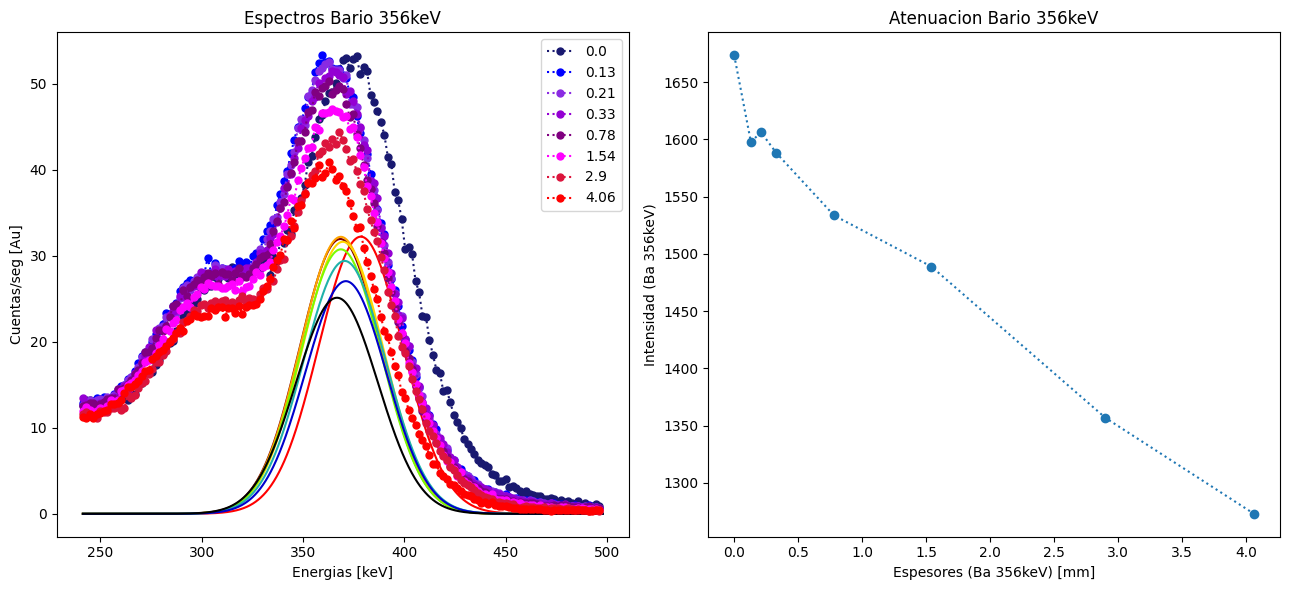

In [260]:
Colores_plot=['red', 'maroon','orange', 'gold', 'lawngreen', 'lightseagreen', 'mediumblue', 'black']
Dom=np.linspace(Eje_Energia[150], Eje_Energia[300], 1000)

Int_Bario_356_g=[]
List_Esp_Ba=[]

c=0

for esp in Ba.keys():
    List_Esp_Ba+=[esp]

Esp_Ba=np.array(List_Esp_Ba)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))

for esp in Ba.keys():

    pop, cov= curve_fit(Doble_gauss, Eje_Energia[150:300], Ba[esp][150:300], p0=[300,15,30,400,15,80], bounds=([0, 0, 0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf]))

    err=np.sqrt(np.diag(cov))

    mu_2=pop[3]
    sigma=pop[4]
    Const=pop[5]

    print('Espesor: ', esp, 'sigma= ', sigma, '+-', err[4], 'Constante=', Const)

    Int_g=Gauss_int(sigma, Const)

    Int_Bario_356_g.append(Int_g)
    
    ax1.errorbar(Eje_Energia[150:300], Ba[esp][150:300], fmt='o:', markersize= 5, color=Colores[c], label=str(esp)) 
    # ax1.plot(Dom, gauss(Dom,pop[0], pop[1], pop[2]), color=Colores_plot[c])
    ax1.plot(Dom, gauss(Dom,pop[3], pop[4], pop[5]), color=Colores_plot[c])
    c=c+1

ax1.set_xlabel('Energias [keV]')
ax1.set_ylabel('Cuentas/seg [Au]')
ax1.set_title('Espectros Bario 356keV')
ax1.legend()

ax2.errorbar(Esp_Ba, np.array(Int_Bario_356_g), fmt='o:', label='Puntos por Integral Normal')
ax2.set_title('Atenuacion Bario 356keV')
ax2.set_xlabel('Espesores (Ba 356keV) [mm]')
ax2.set_ylabel('Intensidad (Ba 356keV)')
ax1.legend()

plt.tight_layout()
plt.show()

### Americio

Espesor:  0.0 sigma=  8.998992943398736 +- 0.024113828625504822 Constante= 171.18395446405503
Espesor:  0.13 sigma=  8.889025305820617 +- 0.02788556985050407 Constante= 148.0453380911856
Espesor:  0.32 sigma=  8.874225726320097 +- 0.027165295611489705 Constante= 114.5805910693065
Espesor:  0.72 sigma=  8.908223496447373 +- 0.03674926839420829 Constante= 67.11460790068027
Espesor:  1.1 sigma=  9.04177885297051 +- 0.044263713890883405 Constante= 40.06279918733411
Espesor:  1.34 sigma=  9.129908946016263 +- 0.045138819768604455 Constante= 29.97821725129129


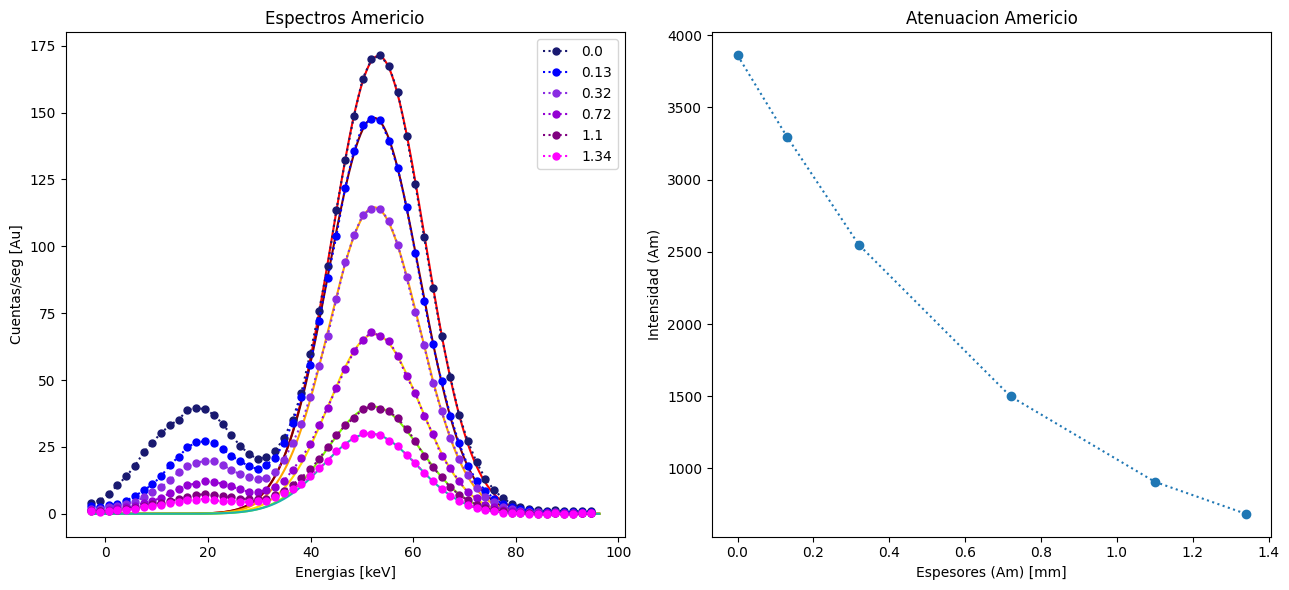

In [225]:
Colores_plot=['red', 'maroon','orange', 'gold', 'lawngreen', 'lightseagreen', 'mediumblue']
Dom=np.linspace(Eje_Energia[7], Eje_Energia[65], 1000)

Int_Americio_g=[]
List_Esp_Am=[]

c=0

for esp in Am.keys():
    List_Esp_Am+=[esp]

Esp_Am=np.array(List_Esp_Am)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))

for esp in Am.keys():

    pop, cov= curve_fit(Doble_gauss, Eje_Energia[7:65], Am[esp][7:65], p0=[22,5,1,E_Am[0],2,1], bounds=([0, 0, 0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf]))

    err=np.sqrt(np.diag(cov))

    mu_2=pop[3]
    sigma=pop[4]
    Const=pop[5]

    print('Espesor: ', esp, 'sigma= ', sigma, '+-', err[4], 'Constante=', Const)

    Int_g=Gauss_int(sigma, Const)

    Int_Americio_g.append(Int_g)
    
    ax1.errorbar(Eje_Energia[7:65], Am[esp][7:65], fmt='o:', markersize= 5, color=Colores[c], label=str(esp)) 
    ax1.plot(Dom, gauss(Dom, mu_2, sigma, Const), color=Colores_plot[c])
    c=c+1

ax1.set_xlabel('Energias [keV]')
ax1.set_ylabel('Cuentas/seg [Au]')
ax1.set_title('Espectros Americio')
ax1.legend()

ax2.errorbar(Esp_Am, np.array(Int_Americio_g), fmt='o:', label='Puntos por Integral Normal')
ax2.set_title('Atenuacion Americio')
ax2.set_xlabel('Espesores (Am) [mm]')
ax2.set_ylabel('Intensidad (Am)')
ax1.legend()

plt.tight_layout()
plt.show()

## Sumas Riemann

### Sodio

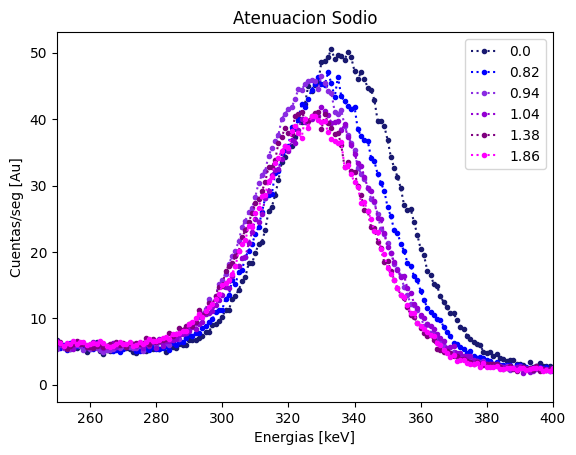

In [131]:
c=0
for esp in Na.keys():
    plt.errorbar(canales[10:], Na[esp][10:], fmt='.:', color=Colores[c], label=str(esp))  
    c=c+1

plt.xlabel('Energias [keV]')
plt.ylabel('Cuentas/seg [Au]')
plt.title('Atenuacion Sodio')
plt.xlim(250,400)
plt.legend()
plt.show()

 Primer Pico 511 keV

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


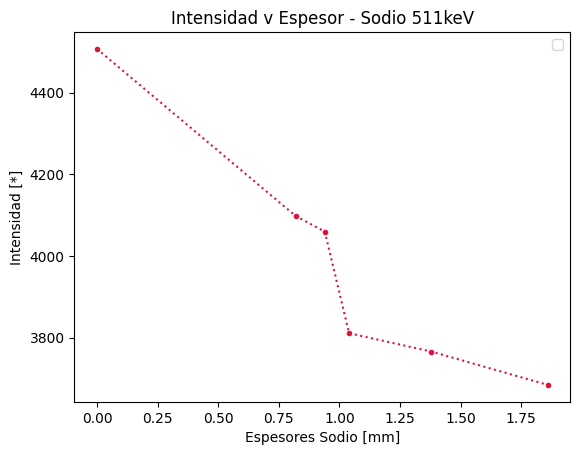

In [132]:
List_I_Na_511=[]
List_Esp_Na=[]

for esp in Na.keys():

    Int=Suma_Riemann(Eje_Energia, Na[esp], 250,400)
    List_I_Na_511+= [Int]
    List_Esp_Na+=[esp]

I_Na_511=np.array(List_I_Na_511)
Esp_Na=np.array(List_Esp_Na)

plt.errorbar(Esp_Na, I_Na_511, fmt='.:', color='crimson')
plt.xlabel('Espesores Sodio [mm]')
plt.ylabel('Intensidad [*]')
plt.title('Intensidad v Espesor - Sodio 511keV')
plt.legend()
plt.show()

### Bario

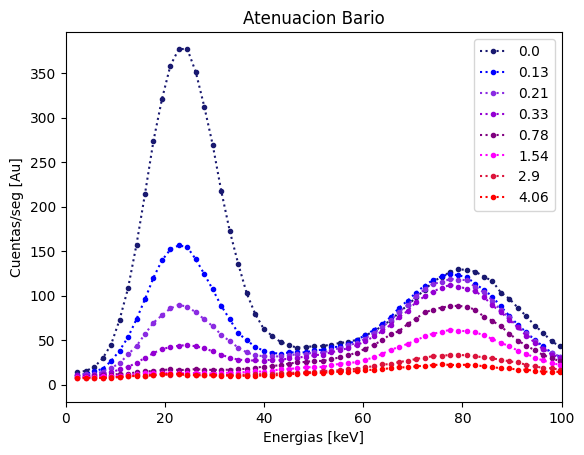

In [133]:
c=0
for esp in Ba.keys():
    plt.errorbar(Eje_Energia[10:], Ba[esp][10:], fmt='.:', color=Colores[c], label=str(esp))  
    c=c+1

plt.xlabel('Energias [keV]')
plt.ylabel('Cuentas/seg [Au]')
plt.title('Atenuacion Bario')
plt.xlim(0,100)
plt.legend()
plt.show()

 Primer Pico 31 keV

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


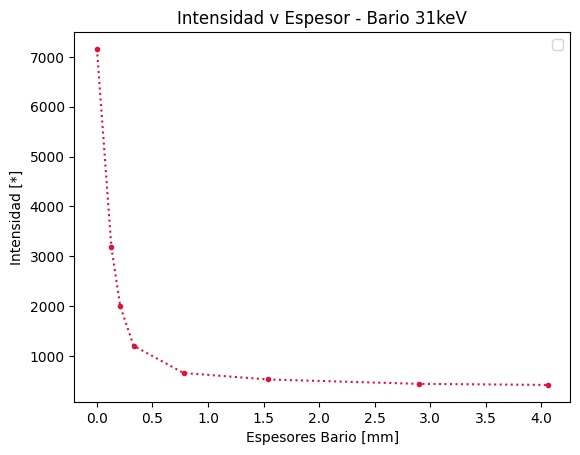

In [134]:
#Primer Pico 31keV

List_I_Ba_31=[]
List_Esp_Ba=[]

for esp in Ba.keys():

    Int=Suma_Riemann(Eje_Energia, Ba[esp], 10, 35)
    List_I_Ba_31+= [Int]
    List_Esp_Ba+=[esp]

I_Ba_31=np.array(List_I_Ba_31)
Esp_Ba=np.array(List_Esp_Ba)

plt.errorbar(Esp_Ba, I_Ba_31, fmt='.:', color='crimson')
plt.xlabel('Espesores Bario [mm]')
plt.ylabel('Intensidad [*]')
plt.title('Intensidad v Espesor - Bario 31keV')
plt.legend()
plt.show()

Segundo Pico 81 keV

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


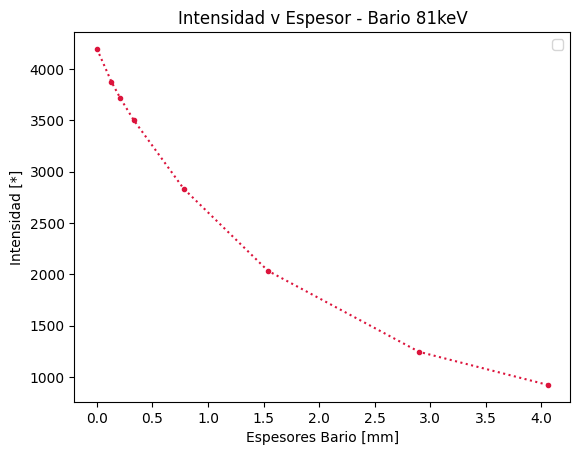

In [135]:
#Segundo Pico 81 keV

List_I_Ba_81=[]
List_Esp_Ba=[]

for esp in Ba.keys():

    Int=Suma_Riemann(Eje_Energia, Ba[esp], 40,70)
    List_I_Ba_81+= [Int]
    List_Esp_Ba+=[esp]

I_Ba_81=np.array(List_I_Ba_81)
Esp_Ba=np.array(List_Esp_Ba)

plt.errorbar(Esp_Ba, I_Ba_81, fmt='.:', color='crimson')
plt.xlabel('Espesores Bario [mm]')
plt.ylabel('Intensidad [*]')
plt.title('Intensidad v Espesor - Bario 81keV')
plt.legend()
plt.show()

Tercer Pico 356 keV

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


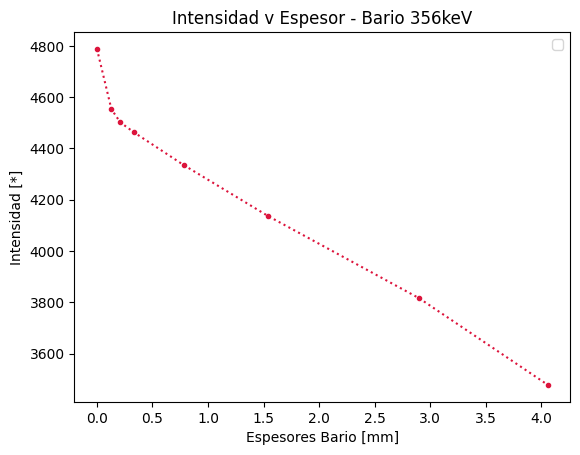

In [136]:
#Segundo Pico 81 keV

List_I_Ba_356=[]
List_Esp_Ba=[]

for esp in Ba.keys():

    Int=Suma_Riemann(Eje_Energia, Ba[esp], 175,265)
    List_I_Ba_356+= [Int]
    List_Esp_Ba+=[esp]

I_Ba_356=np.array(List_I_Ba_356)
Esp_Ba=np.array(List_Esp_Ba)

plt.errorbar(Esp_Ba, I_Ba_356, fmt='.:', color='crimson')
plt.xlabel('Espesores Bario [mm]')
plt.ylabel('Intensidad [*]')
plt.title('Intensidad v Espesor - Bario 356keV')
plt.legend()
plt.show()

### Cobalto

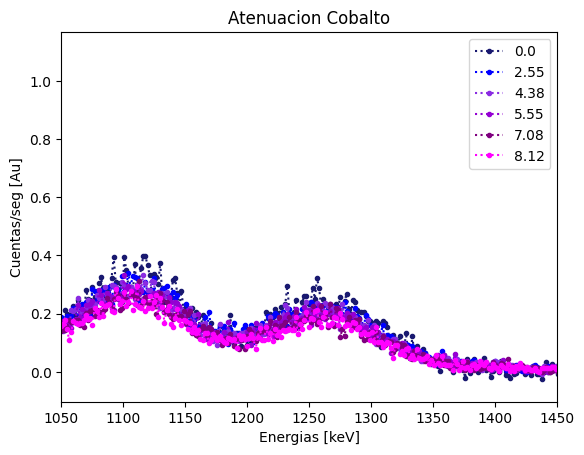

In [137]:
c=0
for esp in Co.keys():
    plt.errorbar(Eje_Energia[10:], Co[esp][10:], fmt='.:', color=Colores[c], label=str(esp))  
    c=c+1

plt.xlabel('Energias [keV]')
plt.ylabel('Cuentas/seg [Au]')
plt.title('Atenuacion Cobalto')
plt.xlim(1050,1450)
plt.legend()
plt.show()


Primer Pico 1173keV

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


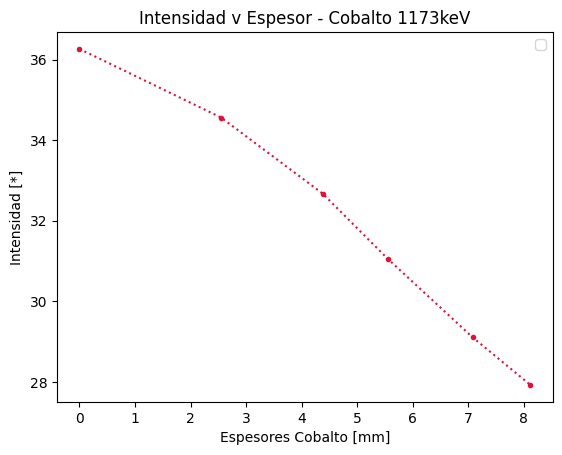

In [138]:
List_I_Co_1173=[]
List_Esp_Co=[]

for esp in Co.keys():

    Int=Suma_Riemann(Eje_Energia, Co[esp], 610,700)
    List_I_Co_1173+= [Int]
    List_Esp_Co+=[esp]

I_Co_1173=np.array(List_I_Co_1173)
Esp_Co=np.array(List_Esp_Co)

plt.errorbar(Esp_Co, I_Co_1173, fmt='.:', color='crimson')
plt.xlabel('Espesores Cobalto [mm]')
plt.ylabel('Intensidad [*]')
plt.title('Intensidad v Espesor - Cobalto 1173keV')
plt.legend()
plt.show()

Segundo Pico 1332 keV

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


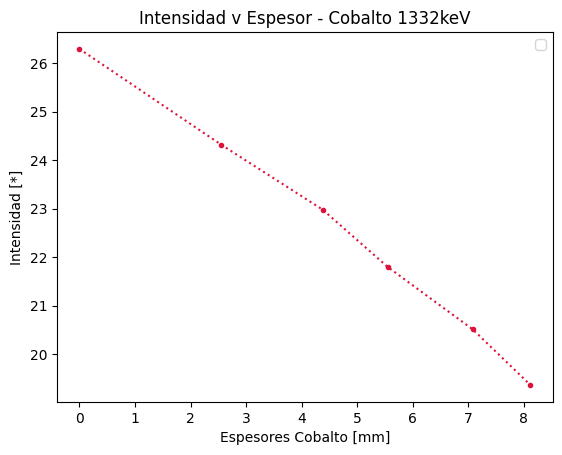

In [139]:
List_I_Co_1332=[]
List_Esp_Co=[]

for esp in Co.keys():

    Int=Suma_Riemann(Eje_Energia, Co[esp], 705,790)
    List_I_Co_1332+= [Int]
    List_Esp_Co+=[esp]

I_Co_1332=np.array(List_I_Co_1332)
Esp_Co=np.array(List_Esp_Co)

plt.errorbar(Esp_Co, I_Co_1332, fmt='.:', color='crimson')
plt.xlabel('Espesores Cobalto [mm]')
plt.ylabel('Intensidad [*]')
plt.title('Intensidad v Espesor - Cobalto 1332keV')
plt.legend()
plt.show()

### Americio

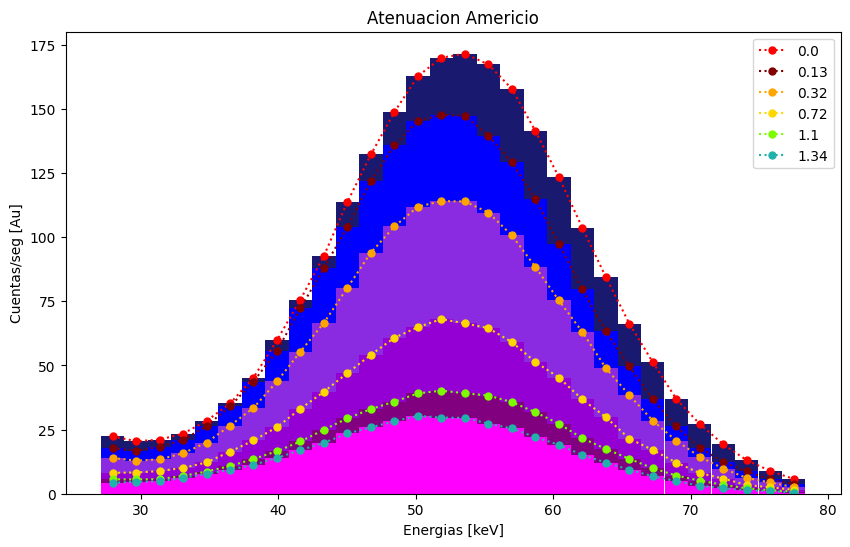

In [140]:
Colores_histo=['red', 'maroon','orange', 'gold', 'lawngreen', 'lightseagreen', 'mediumblue']

c=0

plt.figure(figsize=(10, 6))

for esp in Am.keys():
    plt.errorbar(Eje_Energia[25:55], Am[esp][25:55], fmt='o:', markersize= 5, color=Colores_histo[c], label=str(esp))
    plt.bar(Eje_Energia[25:55],Am[esp][25:55], width=1.7, color=Colores[c]) 
    c=c+1

plt.xlabel('Energias [keV]')
plt.ylabel('Cuentas/seg [Au]')
plt.title('Atenuacion Americio')
plt.legend()
plt.show()

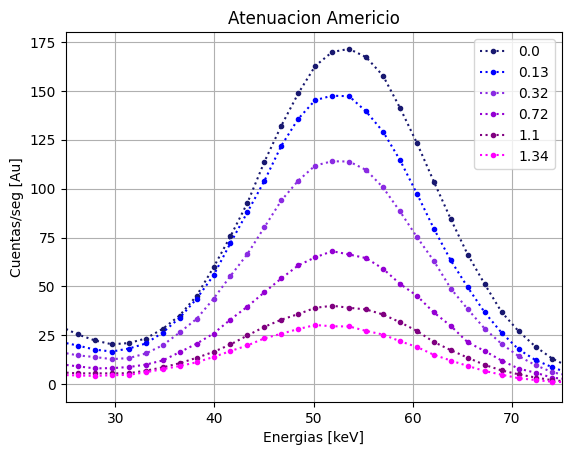

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


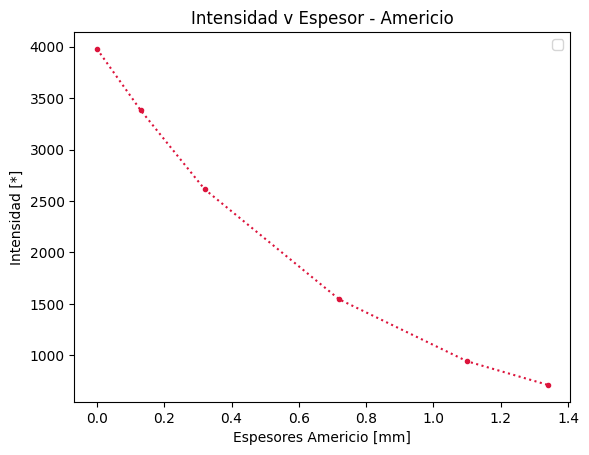

In [220]:
c=0
for esp in Am.keys():
    plt.errorbar(Eje_Energia[10:], Am[esp][10:], fmt='.:', color=Colores[c], label=str(esp))  
    c=c+1

plt.xlabel('Energias [keV]')
plt.ylabel('Cuentas/seg [Au]')
plt.title('Atenuacion Americio')
plt.xlim(25,75)
plt.grid()
plt.legend()
plt.show()

List_I_Am=[]
List_Esp_Am=[]

for esp in Am.keys():

    Int=Suma_Riemann(Eje_Energia, Am[esp], 25,55)
    List_I_Am+= [Int]
    List_Esp_Am+=[esp]

I_Am=np.array(List_I_Am)
Esp_Am=np.array(List_Esp_Am)

plt.errorbar(Esp_Am, I_Am, fmt='.:', color='crimson')
plt.xlabel('Espesores Americio [mm]')
plt.ylabel('Intensidad [*]')
plt.title('Intensidad v Espesor - Americio')
plt.legend()
plt.show()

### Cesio

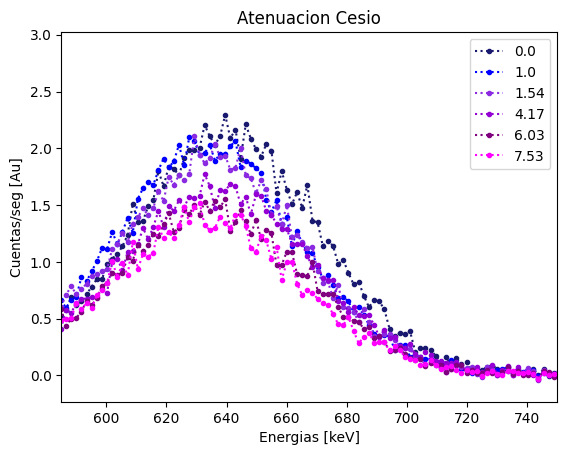

In [142]:
c=0

for esp in Cs.keys():
    plt.errorbar(Eje_Energia[10:], Cs[esp][10:], fmt='.:', color=Colores[c], label=str(esp))  
    c=c+1

plt.xlabel('Energias [keV]')
plt.ylabel('Cuentas/seg [Au]')
plt.title('Atenuacion Cesio')
plt.xlim(585,750)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


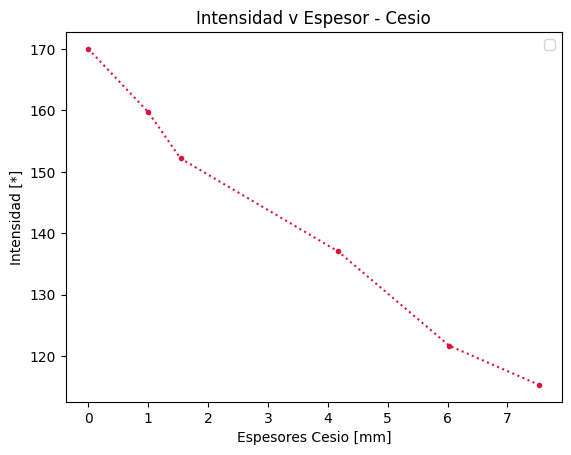

In [143]:
List_I_Cs=[]
List_Esp_Cs=[]

for esp in Cs.keys():

    Int=Suma_Riemann(Eje_Energia, Cs[esp], 325,440)
    List_I_Cs+= [Int]
    List_Esp_Cs+=[esp]

I_Cs=np.array(List_I_Cs)
Esp_Cs=np.array(List_Esp_Cs)

plt.errorbar(Esp_Cs, I_Cs, fmt='.:', color='crimson')
plt.xlabel('Espesores Cesio [mm]')
plt.ylabel('Intensidad [*]')
plt.title('Intensidad v Espesor - Cesio')
plt.legend()
plt.show()

# Lambert -  Beer

In [144]:
def L_B(d, mu_l, C):

    I_I0=np.exp(-mu_l*d)+C
    return I_I0

Paso todas  las intensidades a su cociente con I0 respectivo:

In [145]:
#I_s=[I_Am, I_Ba_31, I_Ba_81, I_Ba_356, I_Cs, I_Co_1173,I_Co_1332]
I_s=[I_Ba_31, I_Am, I_Ba_81, I_Ba_356, I_Cs, I_Co_1173,I_Co_1332]
Espesores= [Esp_Ba, Esp_Am, Esp_Ba, Esp_Ba, Esp_Cs, Esp_Co, Esp_Co]

I_I0_s=[]

for i in I_s:

    for j in range(len(i)):

        I_I0=i[j]/i[0]
        I_I0_s.append(I_I0)

sublistas = []
temp_lista = []

for valor in I_I0_s:
    if valor == 1.0:
        if temp_lista:
            sublistas.append(temp_lista)
            temp_lista = []
        temp_lista.insert(0, valor) # Inserta el valor 1.0 al principio de la sublista
    else:
        temp_lista.append(valor)

# Añadir la última sublista si no está vacía
if temp_lista:
    sublistas.append(temp_lista)


I_I0_Ba_31=np.array(sublistas[0]) #0
I_I0_Am=np.array(sublistas[1]) #1
I_I0_Ba_81=np.array(sublistas[2]) #2
I_I0_Ba_356=np.array(sublistas[3]) #3
I_I0_Cs=np.array(sublistas[4]) #4
I_I0_Co_1173=np.array(sublistas[5]) #5
I_I0_Co_1332=np.array(sublistas[6]) #6
#I_I0_Na_511=np.array(sublistas[7]) #7

7.1295082526600355 0.05748204434399839
0.47365893783628554 0.012808093354274337


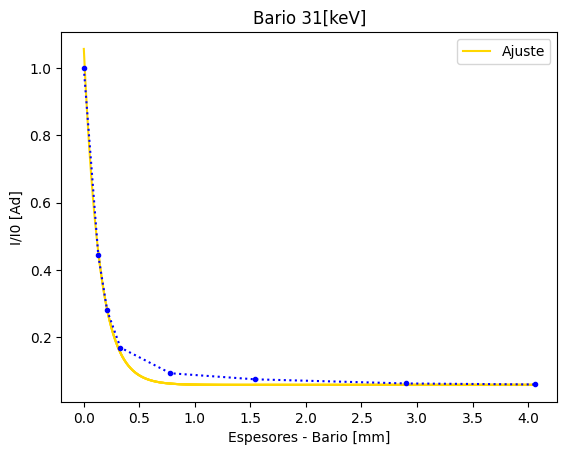

1.3163492409798807 0.0028747281123534326
0.016451159846205623 0.0033819372340277575


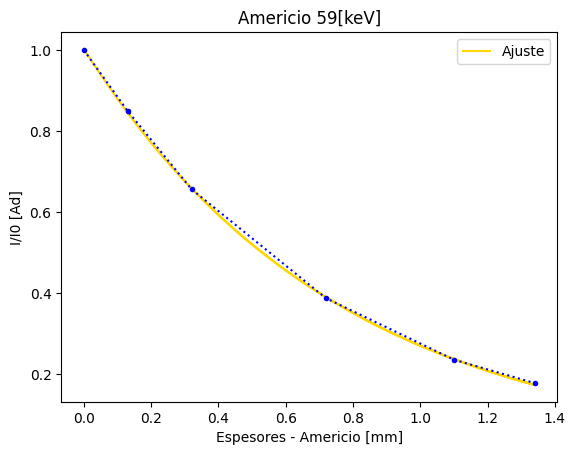

0.4006876996260616 -0.025172699491205916
0.03127694867183378 0.017872000817864088


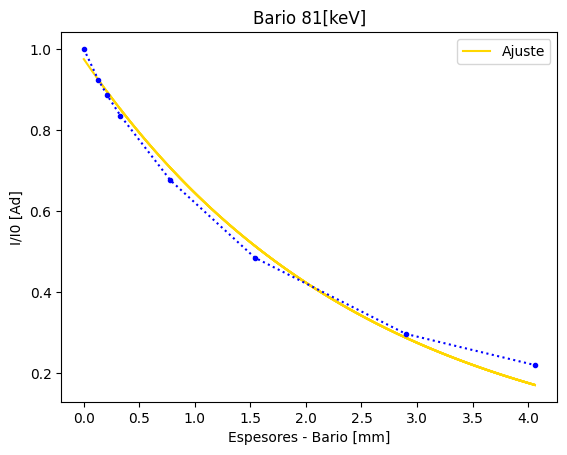

0.06726157406653709 -0.03414858240662124
0.0054117874011711045 0.008090448412470063


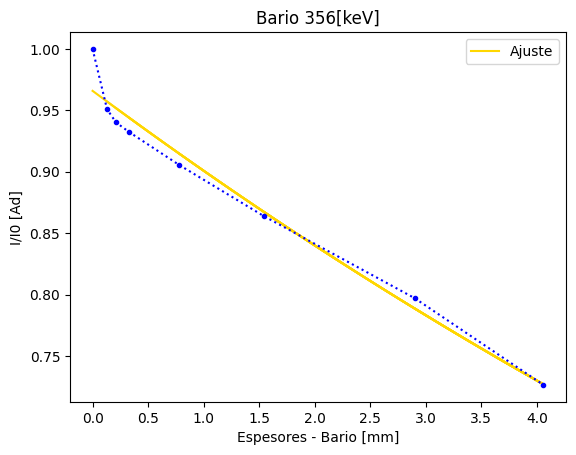

0.050838132460918645 -0.01130500043097734
0.002811955139145349 0.00891993982092577


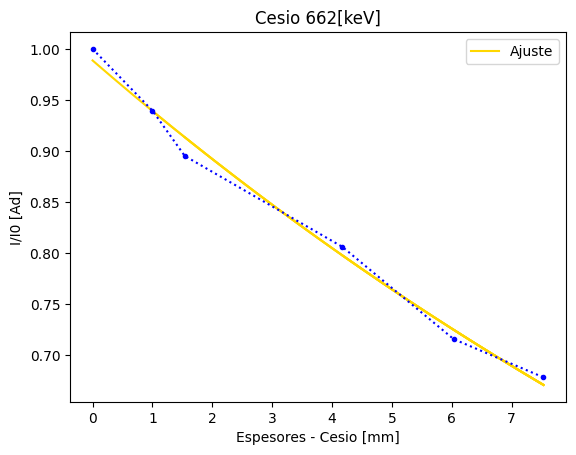

0.03275830716445304 0.017304116082905937
0.0032668569743222247 0.014087151758506793


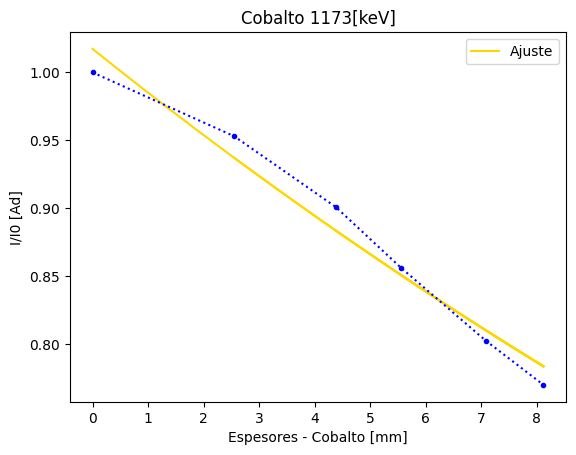

0.03688483087271202 0.009542262069258012
0.0023086127632948174 0.009688989066003215


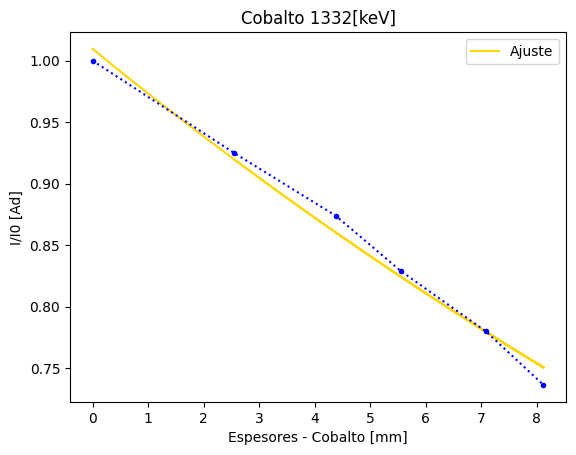

In [146]:
Mu_L=[]
err_Mu_L=[]
Energias_mu=np.array([31. , 59. ,   81. ,  356. , 662. ,  1173, 1332])

Espesores_nom=['Espesores - Bario [mm]','Espesores - Americio [mm]','Espesores - Bario [mm]','Espesores - Bario [mm]','Espesores - Cesio [mm]','Espesores - Cobalto [mm]','Espesores - Cobalto [mm]']
Titulos=['Bario 31[keV]','Americio 59[keV]','Bario 81[keV]','Bario 356[keV]','Cesio 662[keV]','Cobalto 1173[keV]','Cobalto 1332[keV]']

n = 0

for lista_int in sublistas:
    
    array = np.array(lista_int)
    pop, cov = curve_fit(L_B, Espesores[n], array)
    err = np.diag(np.sqrt(cov))

    print(pop[0], pop[1])
    print(err[0], err[1])

    Mu_L.append(pop[0])
    err_Mu_L.append(err[0])

    continuo = np.linspace(Espesores[n], Espesores[n][len(Espesores[n])-1], 1000)

    plt.errorbar(Espesores[n], array, fmt='.:', color='blue')
    plt.plot(continuo, L_B(continuo, pop[0], pop[1]), color='gold', label='Ajuste')
    plt.xlabel(Espesores_nom[n])
    plt.ylabel('I/I0 [Ad]')
    plt.title(Titulos[n])

    # Obtén los handles y labels actuales
    handles, labels = plt.gca().get_legend_handles_labels()
    # Crea un diccionario ordenado para almacenar los labels únicos
    by_label = OrderedDict(zip(labels, handles))
    # Pasa los valores y keys únicos al legend
    plt.legend(by_label.values(), by_label.keys())

    plt.show()
    n = n + 1

## Relacion Mu con la Energia

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


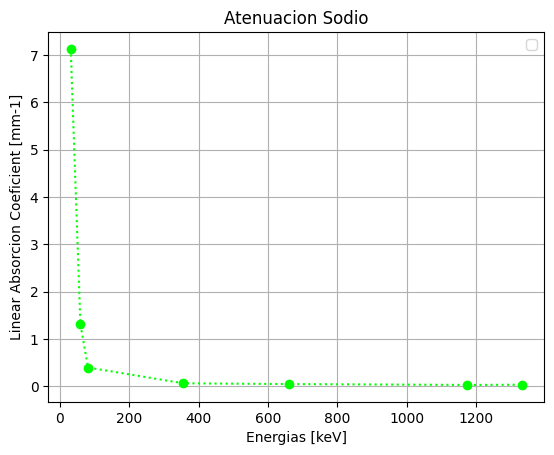

In [147]:
plt.errorbar(Energias_mu,np.array(Mu_L), fmt='o:', color='lime')
plt.xlabel('Energias [keV]')
plt.ylabel('Linear Absorcion Coeficient [mm-1]')
plt.title('Atenuacion Sodio')
plt.grid()
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1.687030548111906
[0.00316844]


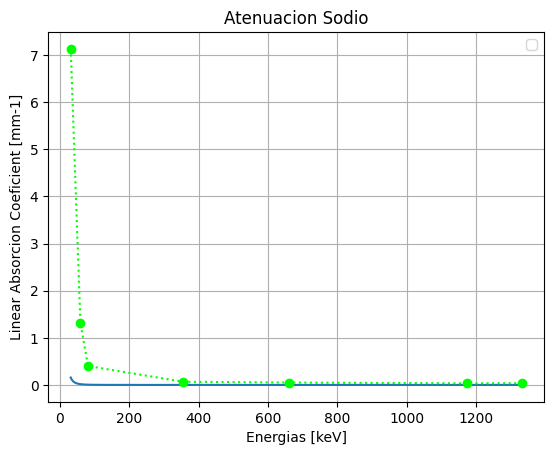

In [148]:
def Ef_ph(E, A):
    sig=A*(29**4)/(E**3.5)
    return sig

pop_ph, cov_ph= curve_fit(Ef_ph, Energias_mu, np.array(Mu_L))

err_ph=np.sqrt(np.diag(cov))
print(pop_ph[0])
print(cov_ph[0])

dom=np.linspace(Energias_mu[0], Energias_mu[len(Energias_mu)-1], 10000)

plt.errorbar(Energias_mu,np.array(Mu_L), fmt='o:', color='lime')
plt.plot(dom, Ef_ph(dom, pop[0]))
plt.xlabel('Energias [keV]')
plt.ylabel('Linear Absorcion Coeficient [mm-1]')
plt.title('Atenuacion Sodio')
plt.grid()
plt.legend()
plt.show()